# ESS330 Yellowstone Project

Sammy Tetrault (CSU)  
Zoe Gagalis (CSU)  
Zoe Ellis (CSU)  
April 10, 2025

## Introduction

Wolf reintroduction after their nearly 70-year absence in Yellowstone National Park has been one of the most highly monitored, discussed, and debated wildlife restoration efforts in recent decades. Following the reintroduction of the wolves (Canis lupus) to this part of Wyoming as a wildlife conservation effort, there have been noticeable changes to surrounding ecosystems, including other mammal populations such as bison and elk, as well as plant populations such as willows and other riparian vegetation within the national park ([Ripple & Beschta, 2012](#ref-ripple2012)). With how extensive this research is presented, as well as how long the study has gone on for, our goal is to zoom in on aspects regarding the predator/prey relationship and its overall effect on Yellowstone. Our project, which will have a primary focus on species population dynamics and trends, will aim to understand and explain these impacts and how trophic cascades can have an enormous and lasting impact on ecosystems. Importantly, these effects are not always straightforwardly positive or negative. While wolf reintroduction has supported the regrowth of riparian habitats and enhanced biodiversity in some areas, it has also shifted the dynamics of competition among prey species and changed the structure of Yellowstone’s food webs. By exploring how these interactions evolve over time, we aim to highlight the multifaceted and interconnected nature of ecosystem responses to change. The project and analysis will focus on how these trophic interactions can change, help, and hinder surrounding habitats, ecosystems, and food webs. We suspect that the analysis of the data we have gathered on wolf reintroduction in the park regarding species population counts will reveal dramatic changes in the populations of both elk and bison, and will illustrate how bringing wolves back to this area creates cascading impacts on the entire ecosystem, by demonstrating how wolves impact two species who have existed in Yellowstone without any natural predators for many years. It is likely that elk will show a steep decreasing trend after wolf reintroduction, as their population was largely uncontrolled for several decades and allowed to explode to high numbers ([Metz et al., 2016](#ref-metz2016)). Bison, which are naturally less vulnerable to predators, will likely respond differently in regards to population numbers, as the decreasing number of elk allows the bison to live in an area where there is now less competition for resources with other species ([Smith et al., 2000](#ref-smith2000)). Through our data analysis, we aim to show the indirect effects of this major change, and we hope to be able to create an easily palatable and understandable reference for people like us, who are otherwise removed from these issues. By making this information more digestible, we hope for our audience to gain a broader understanding of this issue and why it is important to understand trophic dynamics within the ecosystems that we know and love. Additionally, since Colorado has been experimenting with wolf reintroduction since 2023, an action that has been met with widespread controversy and criticism, we hope that our analysis of these impacts will help Coloradans better understand the impacts of bringing the wolf population back to its native habitat. While this conservation initiative has been controversial for many residents in surrounding areas, we hope to help provide a better understanding of why it was done, its impacts, and the importance of efforts like this one.

## Data Exploration

#### Data Description

The data that we are looking at comes from a study conducted by David Cooper and Tom Hobbs of Colorado State University. Their study investigated Salix height as a response to browsing and the water table ([Cooper & Hobbs, 2023](#ref-cooper)).For our study, we are interested in the relationship between wolf population count and grazer population counts (elk and bison). The first dataset that we are using is a bison data csv which includes date, population count, adult count, and calf count. The second dataset is a wolf data csv which includes site, year, and population count. The third dataset is an elk data csv which includes year, mean population count, and upper and lower confidence intervals.

#### Opening the data

In [ ]:
library(readr)

library(here)

here() starts at C:/Users/sammy/OneDrive/Desktop/ESS330/ESS330-Yellowstone-Project

Rows: 66 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): date
dbl (2): year, calves
num (2): total, adults

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 34 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): year, mean, lwrCL, uprCL

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 3 Columns: 28
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Site
dbl (27): 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

#### Cleaning the data

In [ ]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

#### Visualizing the data

ℹ Please use the `linewidth` argument instead.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'

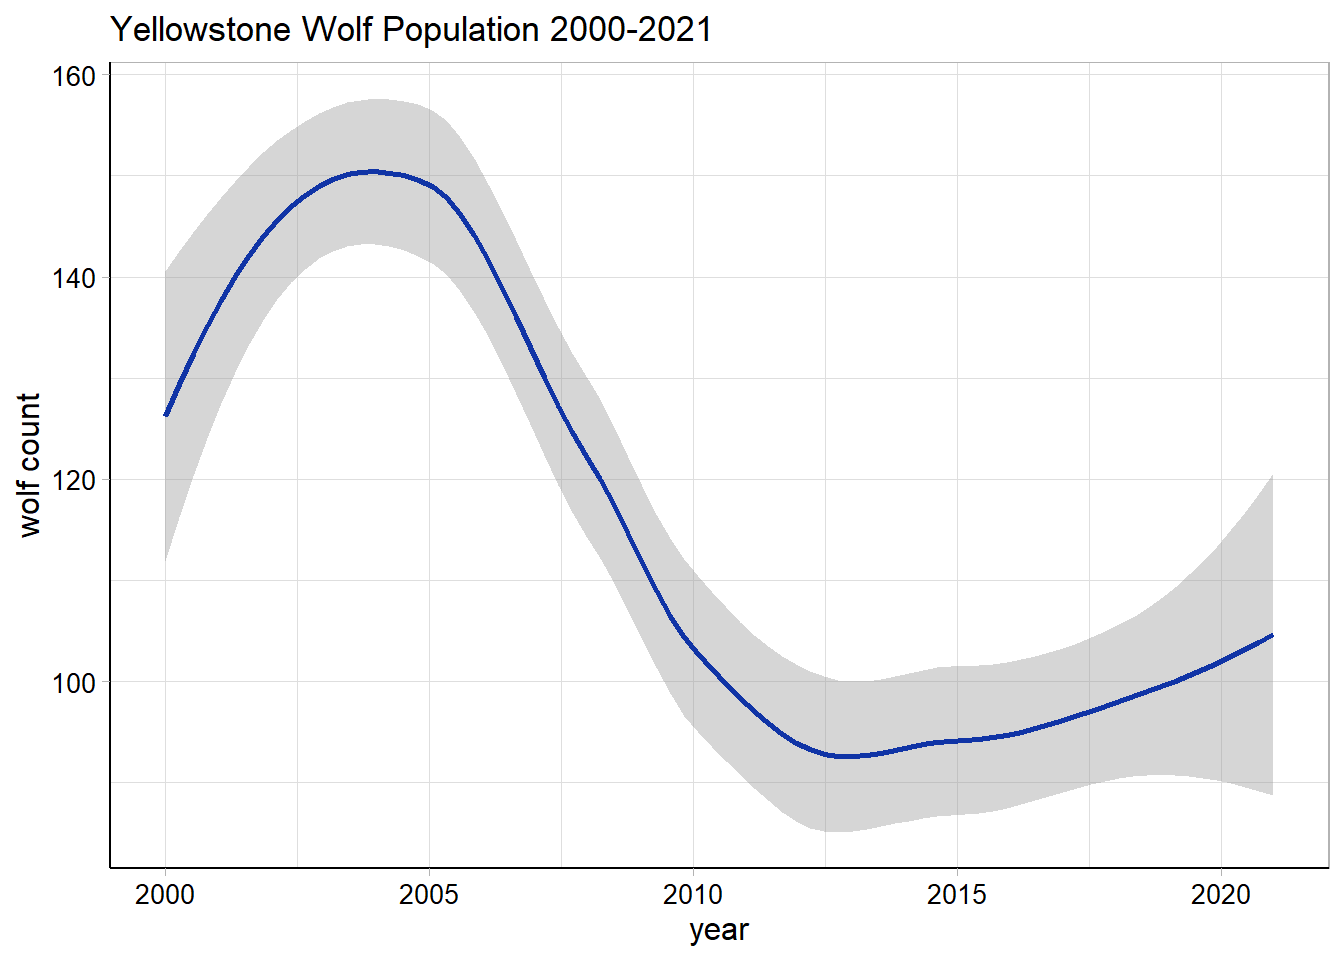

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'

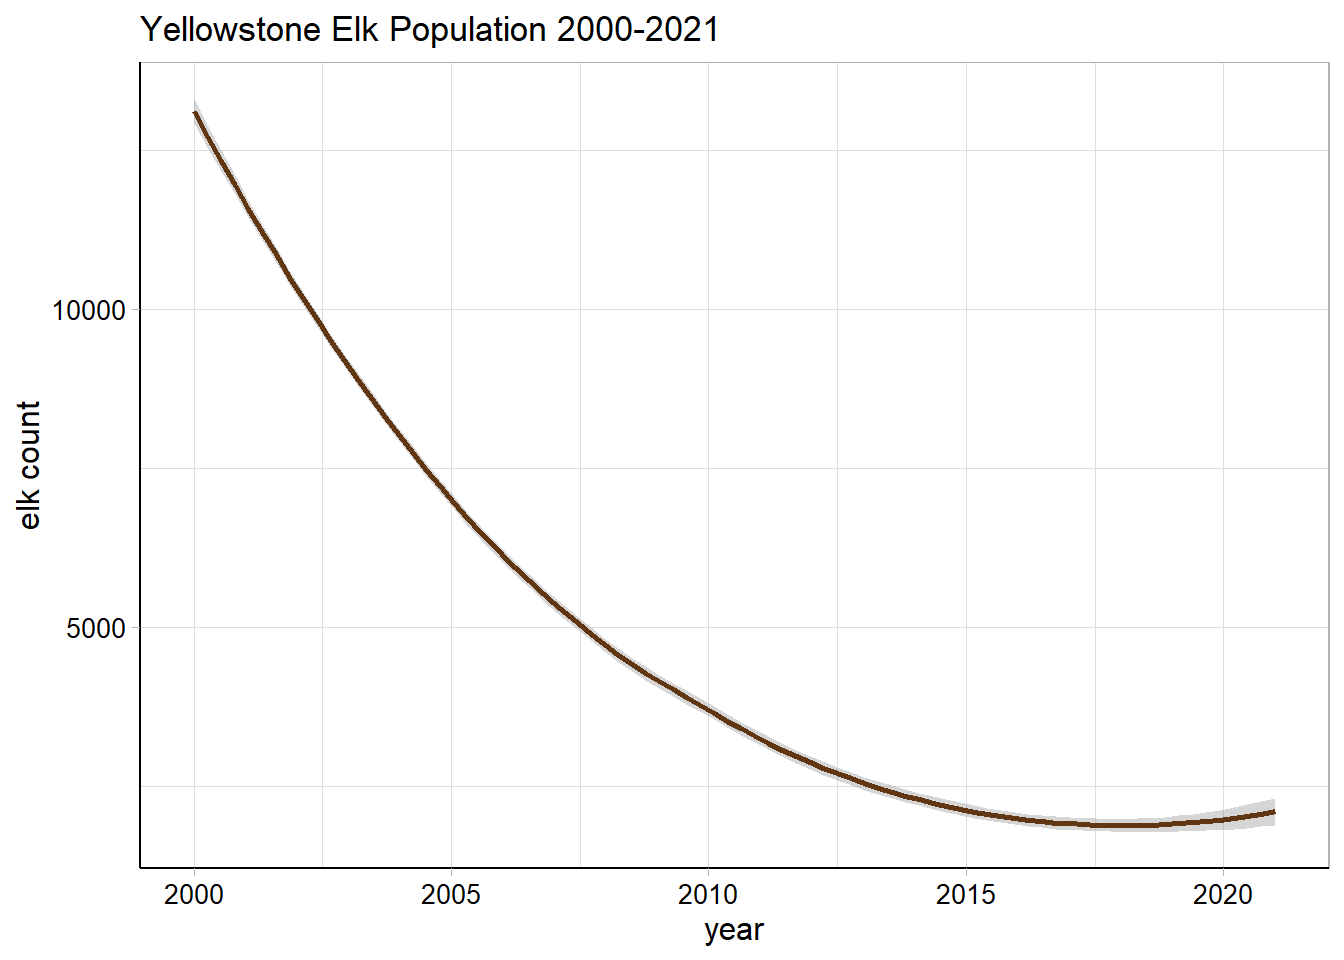

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'

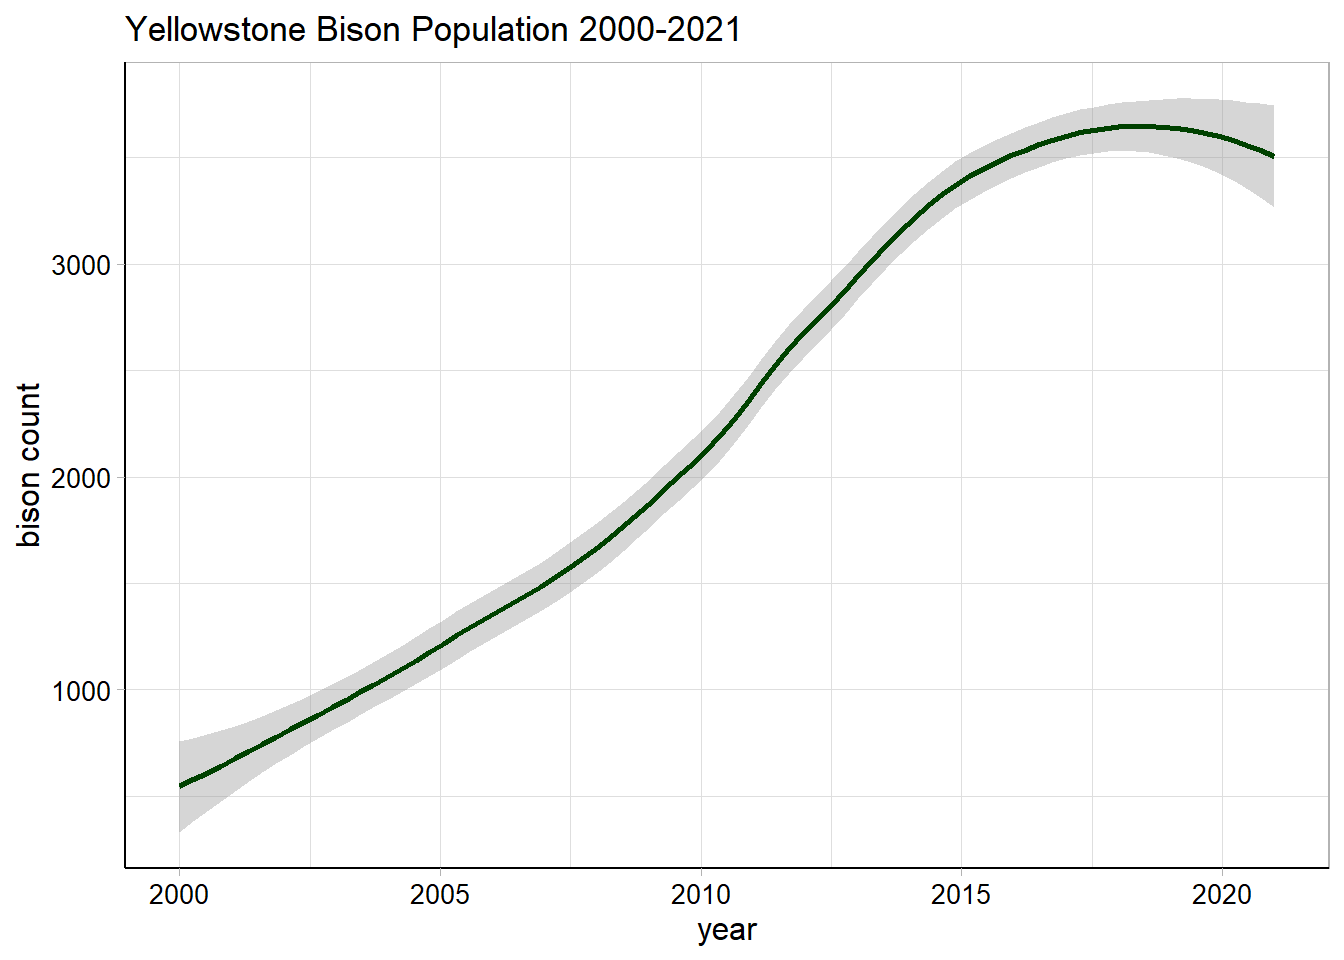

In [ ]:
library(ggplot2)

wolf_pop_plot = ggplot(data = data, aes(x = year, y = wolf_count)) +
  geom_smooth(color = "#1034A6") +
  labs(title = "Yellowstone Wolf Population 2000-2021",
       x = "year",
       y = "wolf count") +
  theme_light() +
# making axes nicely visible
  theme(axis.title.x = element_text(size = 12),
        axis.title.y = element_text(size = 12),
        axis.text.x = element_text(size = 10, color = "black"),
        axis.text.y = element_text(size = 10, color = "black"),
        axis.line = element_line(color = "black", size = 0.5))

#### Testing the data

First we tested the wolf count data for normality using the Shapiro-Wilk test. This test had a p-value of 5.507e-06, indicating that we should reject the null. The null of this test is that the data is normal, thus this indicates that the wolf population data is not normal.

In [ ]:
shapiro.test(data$wolf_count)


    Shapiro-Wilk normality test

data:  data$wolf_count
W = 0.86479, p-value = 5.507e-06

Next, we tested the elk count data using the same test. Again, the p-value was highly significant(2.789e-07). This indicates that the elk population data is also not normal.

In [ ]:
shapiro.test(data$elk_count)


    Shapiro-Wilk normality test

data:  data$elk_count
W = 0.82078, p-value = 2.789e-07

Lastly, we tested the bison count data using the same test. Once again, the p-value was highly significant(0.0005066). This suggests that the bison population data is also not normal.

In [ ]:
shapiro.test(data$bison_count)


    Shapiro-Wilk normality test

data:  data$bison_count
W = 0.91907, p-value = 0.0005066

The next test we ran was a QQ test. We generated QQ plots for each population count and from looking at the plots found that while the populations do tend to follow the normal distribution line, there are deviations for all three groups, suggesting non-normality.


Attaching package: 'ggpubr'

The following objects are masked from 'package:flextable':

    border, font, rotate

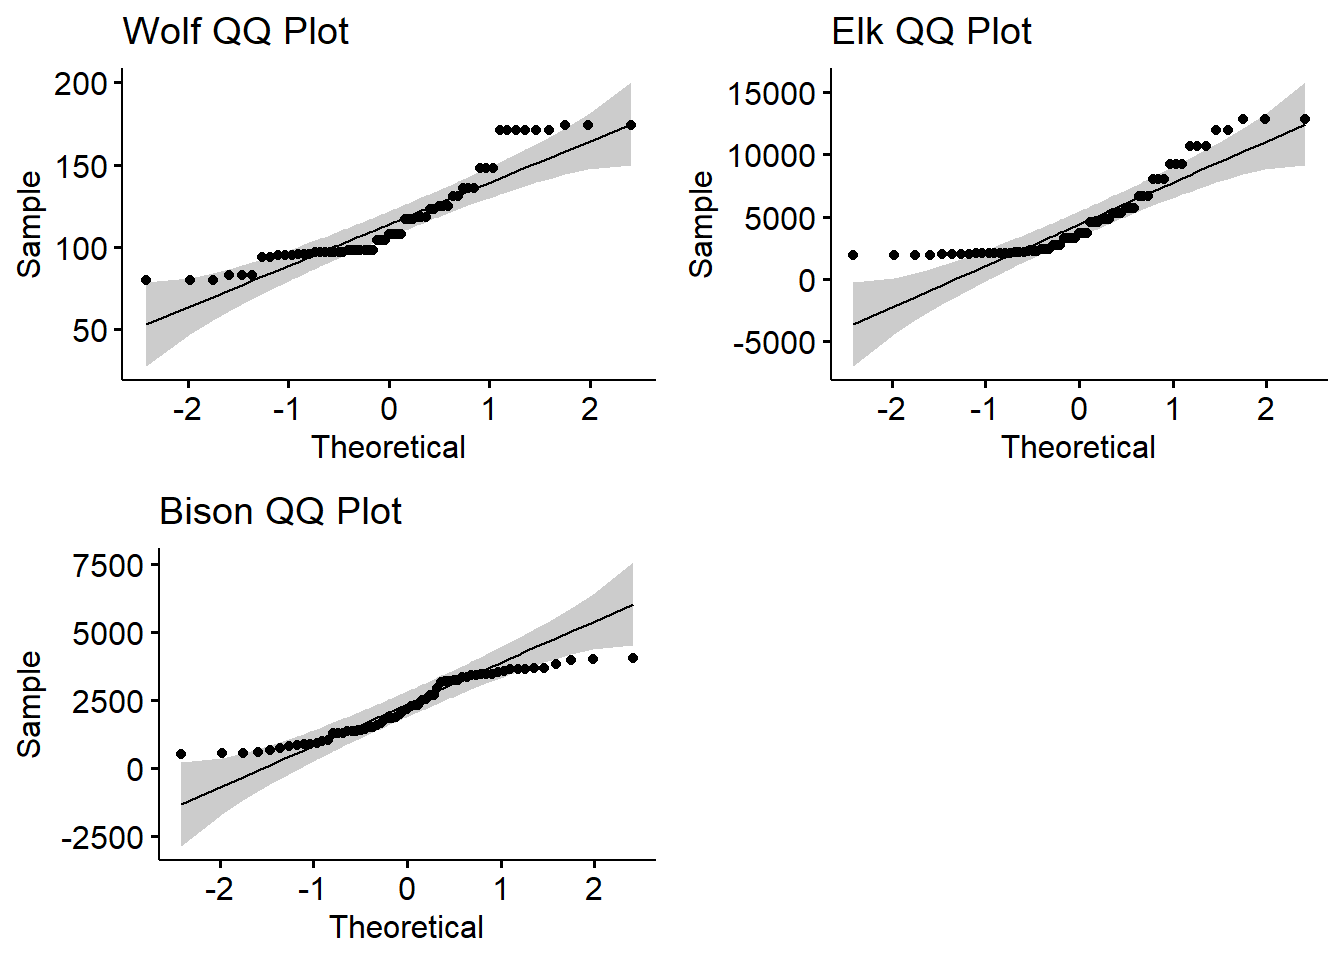

In [ ]:
# wolf qqplot
library(ggpubr)

#### Creating Models

In [ ]:
library(modeltime)

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.7     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tibble       3.2.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.3.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.4     ✔ yardstick    1.3.2
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::compose()  masks flextable::compose()
✖ purrr::discard()  masks scales::discard()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org


Attaching package: 'lubridate'

The following objects are masked from 'package:base':

    date, intersect, setdiff, union

tibble [63 × 4] (S3: tbl_df/tbl/data.frame)
 $ year       : num [1:63] 2000 2000 2000 2001 2001 ...
 $ wolf_count : num [1:63] 117 117 117 131 131 148 148 148 174 174 ...
 $ elk_count  : num [1:63] 12835 12835 12835 11936 11936 ...
 $ bison_count: int [1:63] 553 508 590 661 719 548 812 805 878 888 ...

tibble [22 × 4] (S3: tbl_df/tbl/data.frame)
 $ year       : Date[1:22], format: "2000-01-01" "2001-01-01" ...
 $ wolf_count : num [1:22] 117 131 148 174 171 118 136 171 125 96 ...
 $ bison_count: num [1:22] 550 690 722 921 1060 ...
 $ elk_count  : num [1:22] 12835 11936 10662 9215 7974 ...

Using date_var: year

frequency = 5 observations per 5 years

frequency = 5 observations per 5 years
frequency = 5 observations per 5 years
frequency = 5 observations per 5 years

# A tibble: 4 × 9
  .model_id          .model_desc       .type   mae  mape  mase smape  rmse   rsq
  <chr>              <chr>             <chr> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1 Wolf Predict Bison REGRESSION WITH … Fitt…  190.  7.87 0.735  7.82  224. 0.926
2 Wolf Predict Elk   REGRESSION WITH … Fitt…  206.  6.79 0.795  6.84  275. 0.943
3 Elk Predict Bison  REGRESSION WITH … Fitt…  217.  8.28 0.842  8.31  266. 0.899
4 Bison Predict Elk  REGRESSION WITH … Fitt…  178.  5.80 0.689  5.93  265. 0.951

#### Creating Actual Vs. Predicted Models

In [ ]:
forecast <- forecast %>%
  filter(.model_desc != "ACTUAL") %>%
  rename(year = .index)%>%
  select(.model_id, year, .value)

merged_vals <- merge(forecast, data, by = "year")

wolf_predict_bison <- merged_vals %>%
  filter(.model_id == "Wolf Predict Bison")

wolf_predict_elk <- merged_vals %>%
  filter(.model_id == "Wolf Predict Elk")

elk_predict_bison <- merged_vals %>%
  filter(.model_id == "Elk Predict Bison")

bison_predict_elk <- merged_vals %>%
  filter(.model_id == "Bison Predict Elk")

lm_wolf_bison <- lm(bison_count ~ .value, data = wolf_predict_bison)

summary(lm_wolf_bison)


Call:
lm(formula = bison_count ~ .value, data = wolf_predict_bison)

Residuals:
   Min     1Q Median     3Q    Max 
-518.1 -369.5 -138.3  445.8  558.6 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2071.6713   828.6843  -2.500   0.0266 *  
.value          0.9422     0.1556   6.056 4.06e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 433.6 on 13 degrees of freedom
Multiple R-squared:  0.7383,    Adjusted R-squared:  0.7182 
F-statistic: 36.68 on 1 and 13 DF,  p-value: 4.058e-05


Call:
lm(formula = elk_count ~ .value, data = wolf_predict_elk)

Residuals:
   Min     1Q Median     3Q    Max 
-889.7 -367.8 -177.5  303.0 1438.2 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 37593.130   5669.231   6.631 1.63e-05 ***
.value        -16.759      2.736  -6.125 3.63e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 619.7 on 13 degrees of freedom
Multiple R-squared:  0.7427,    Adjusted R-squared:  0.7229 
F-statistic: 37.52 on 1 and 13 DF,  p-value: 3.63e-05


Call:
lm(formula = bison_count ~ .value, data = elk_predict_bison)

Residuals:
   Min     1Q Median     3Q    Max 
-696.2 -174.1   25.3  261.7  453.6 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.279e+04  1.977e+03  -6.471 2.10e-05 ***
.value       4.968e+00  6.251e-01   7.947 2.41e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 350.2 on 13 degrees of freedom
Multiple R-squared:  0.8293,    Adjusted R-squared:  0.8162 
F-statistic: 63.15 on 1 and 13 DF,  p-value: 2.405e-06


Call:
lm(formula = elk_count ~ .value, data = bison_predict_elk)

Residuals:
    Min      1Q  Median      3Q     Max 
-715.17 -334.80   58.11  242.67  897.04 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.145e+04  1.535e+03  -7.462 4.75e-06 ***
.value       7.782e+00  8.309e-01   9.365 3.83e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 438.9 on 13 degrees of freedom
Multiple R-squared:  0.8709,    Adjusted R-squared:  0.861 
F-statistic: 87.71 on 1 and 13 DF,  p-value: 3.83e-07

#### Plotting Actual Vs. Predicted

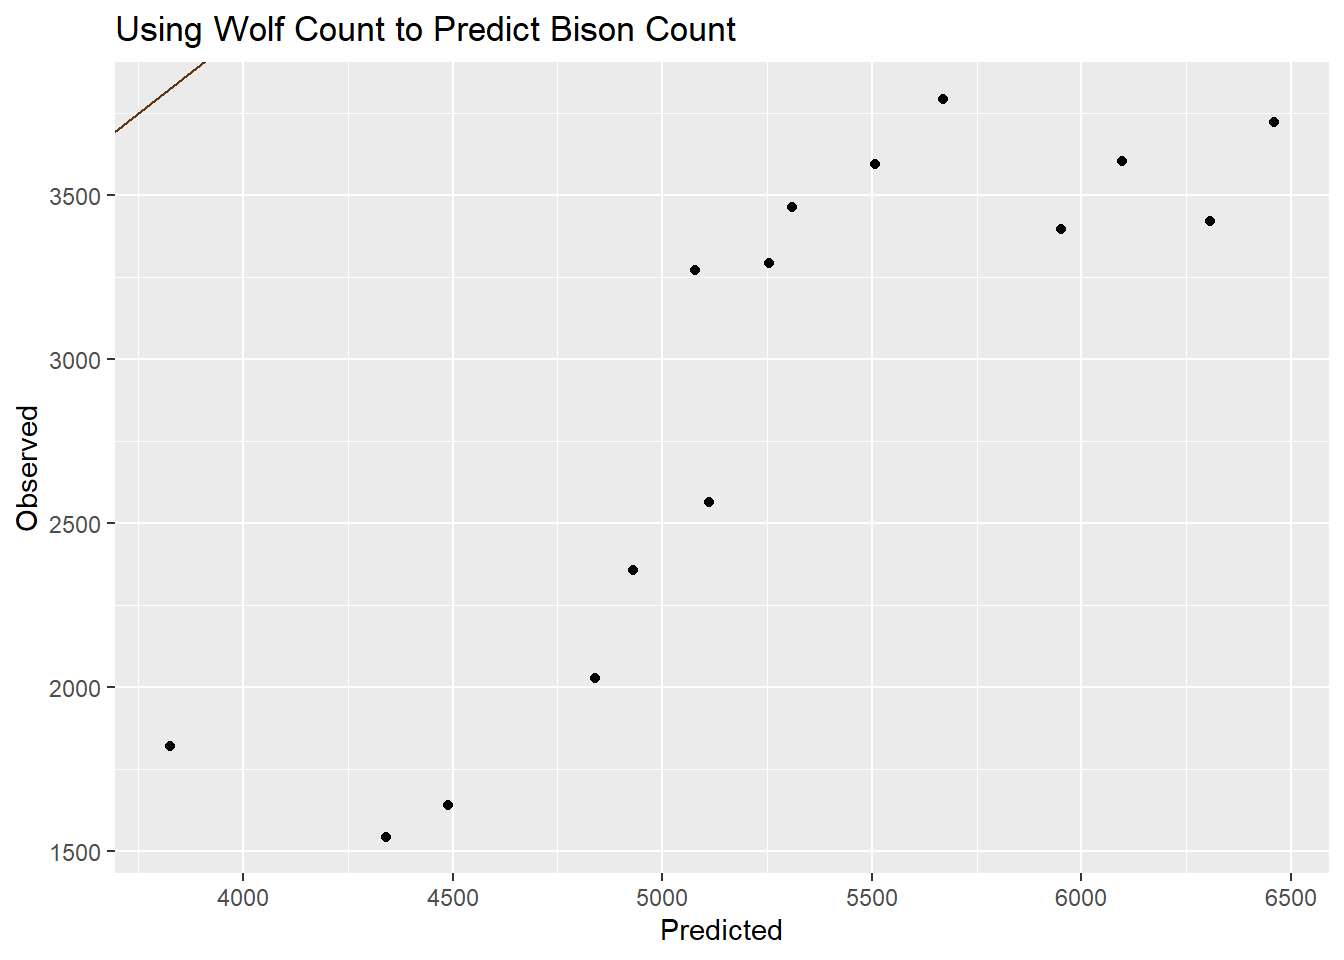

In [ ]:
library(ggplot2)

lm_wolf_bison <- ggplot(wolf_predict_bison, aes(x = .value, y = bison_count)) +
  geom_point() +
  geom_abline(slope = 1, intercept = 0, color = "#613613")+
  labs(x = "Predicted", y = "Observed",
       title = "Using Wolf Count to Predict Bison Count")

print(lm_wolf_bison)

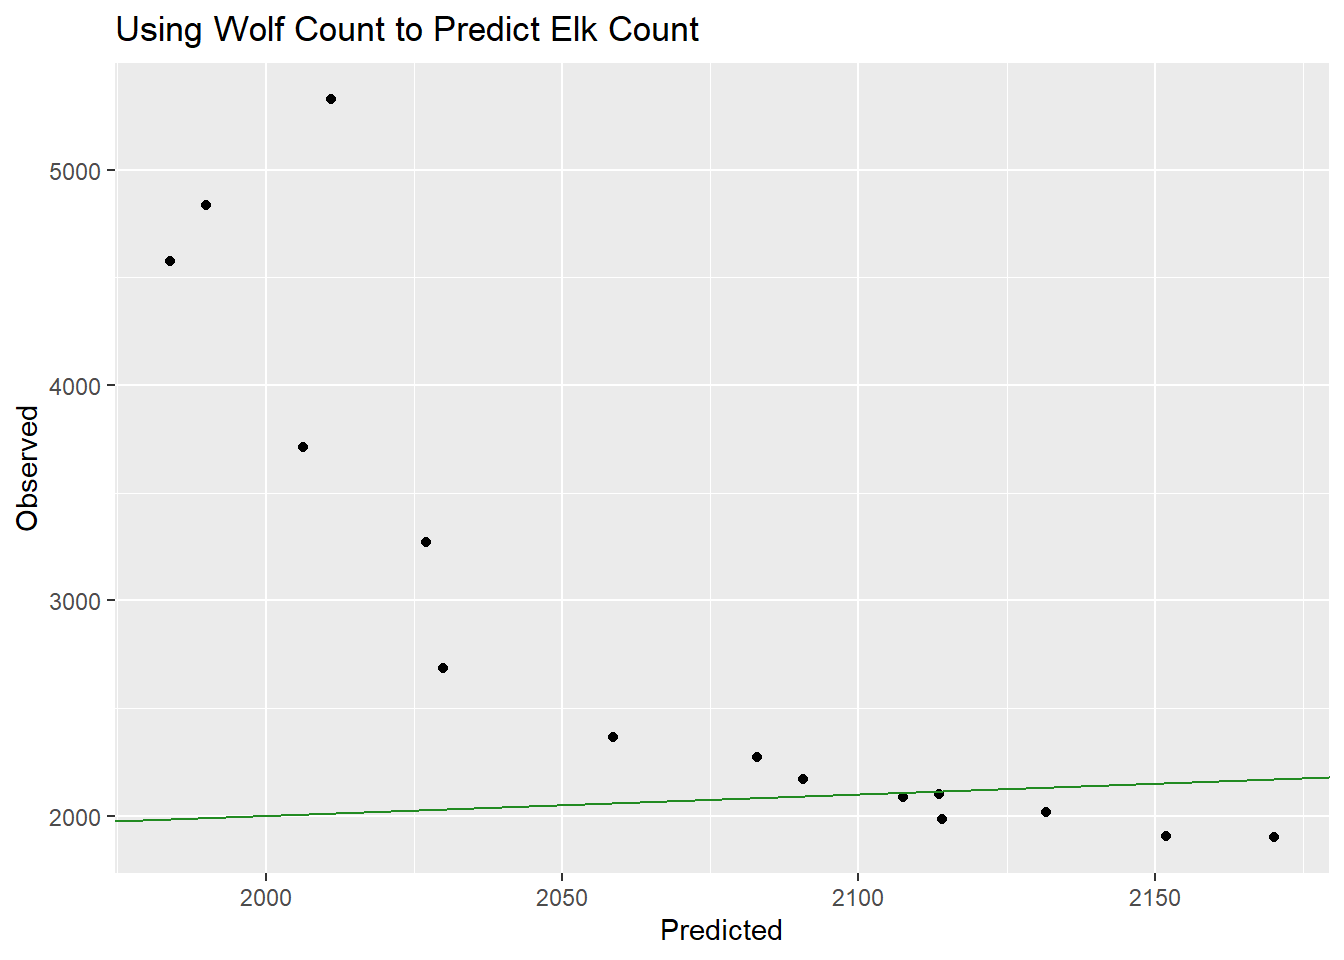

In [ ]:
library(ggplot2)

lm_wolf_elk <- ggplot(wolf_predict_elk, aes(x = .value, y = elk_count)) +
  geom_point() +
  geom_abline(slope = 1, intercept = 0, color = "#228B22")+
  labs(x = "Predicted", y = "Observed",
       title = "Using Wolf Count to Predict Elk Count")

print(lm_wolf_elk)

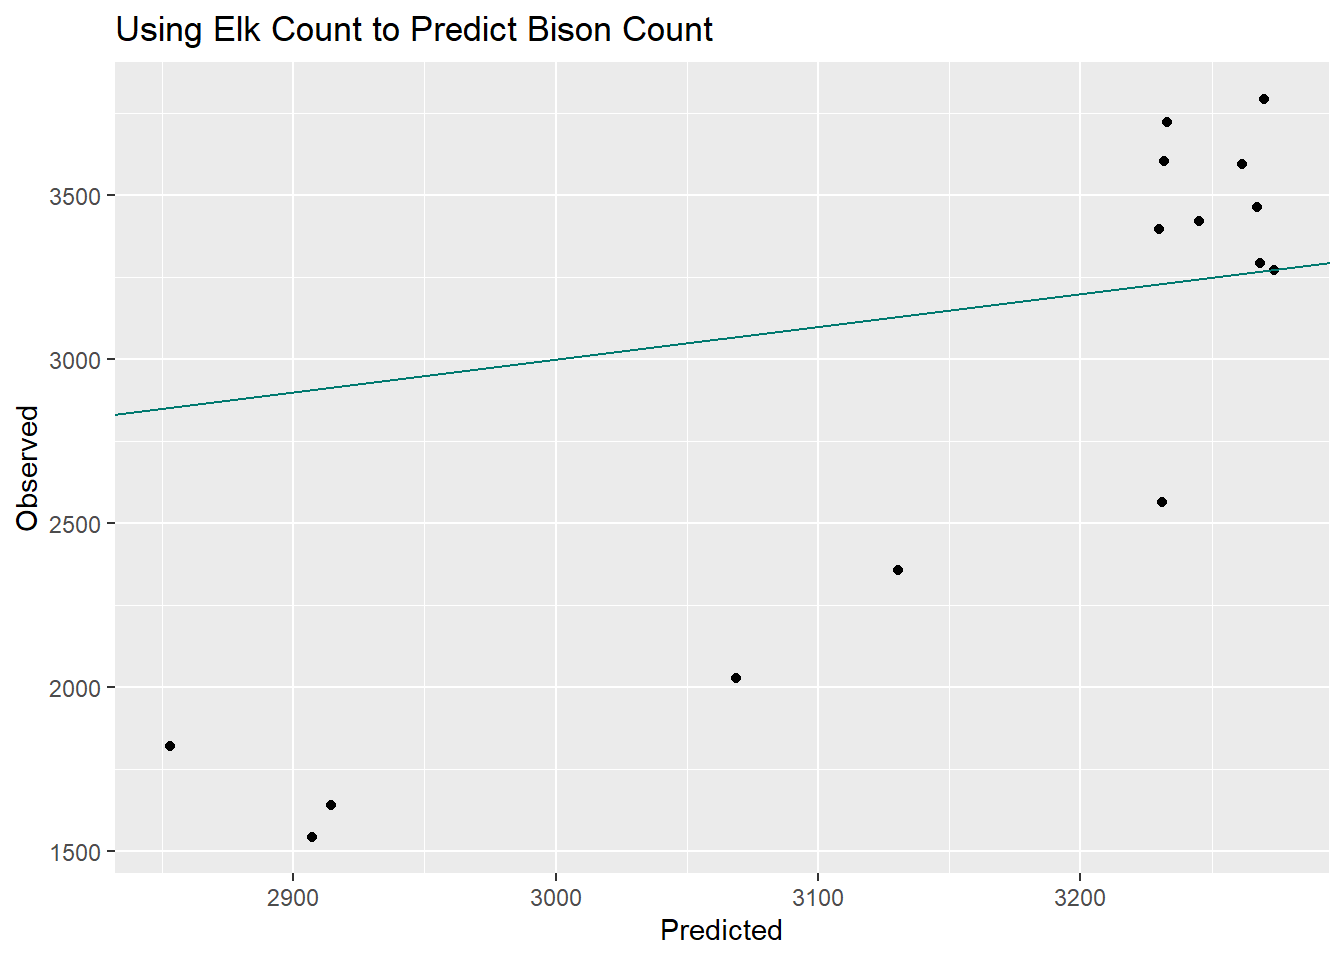

In [ ]:
library(ggplot2)

lm_elk_bison <- ggplot(elk_predict_bison, aes(x = .value, y = bison_count)) +
  geom_point() +
  geom_abline(slope = 1, intercept = 0, color = "#01796F")+
  labs(x = "Predicted", y = "Observed",
       title = "Using Elk Count to Predict Bison Count")

print(lm_elk_bison)

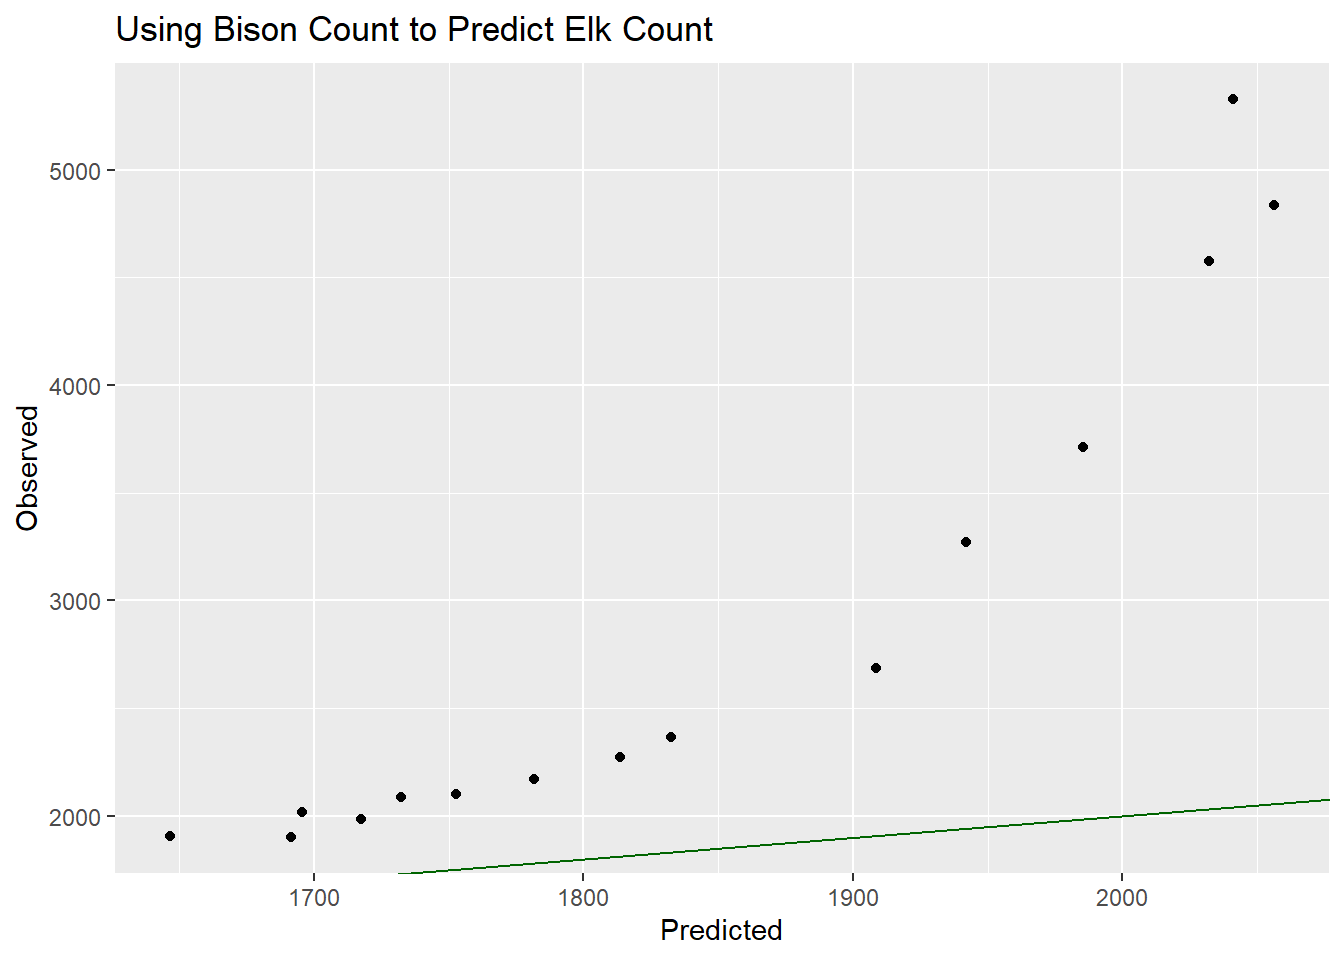

In [ ]:
library(ggplot2)

lm_bison_elk <- ggplot(bison_predict_elk, aes(x = .value, y = elk_count)) +
  geom_point() +
  geom_abline(slope = 1, intercept = 0, color = "#006400") +
  labs(x = "Predicted", y = "Observed",
       title = "Using Bison Count to Predict Elk Count")

print(lm_bison_elk)

#### GLM Models

##### Wolf vs. Bison


Attaching package: 'performance'

The following objects are masked from 'package:yardstick':

    mae, rmse


Call:
glm(formula = bison_count ~ wolf_count, family = poisson, data = data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  9.3081601  0.0216801  429.34   <2e-16 ***
wolf_count  -0.0141266  0.0001975  -71.54   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 13464.1  on 21  degrees of freedom
Residual deviance:  7534.7  on 20  degrees of freedom
AIC: 7745.6

Number of Fisher Scoring iterations: 4

[1] 0.4403906

`geom_smooth()` using formula = 'y ~ x'

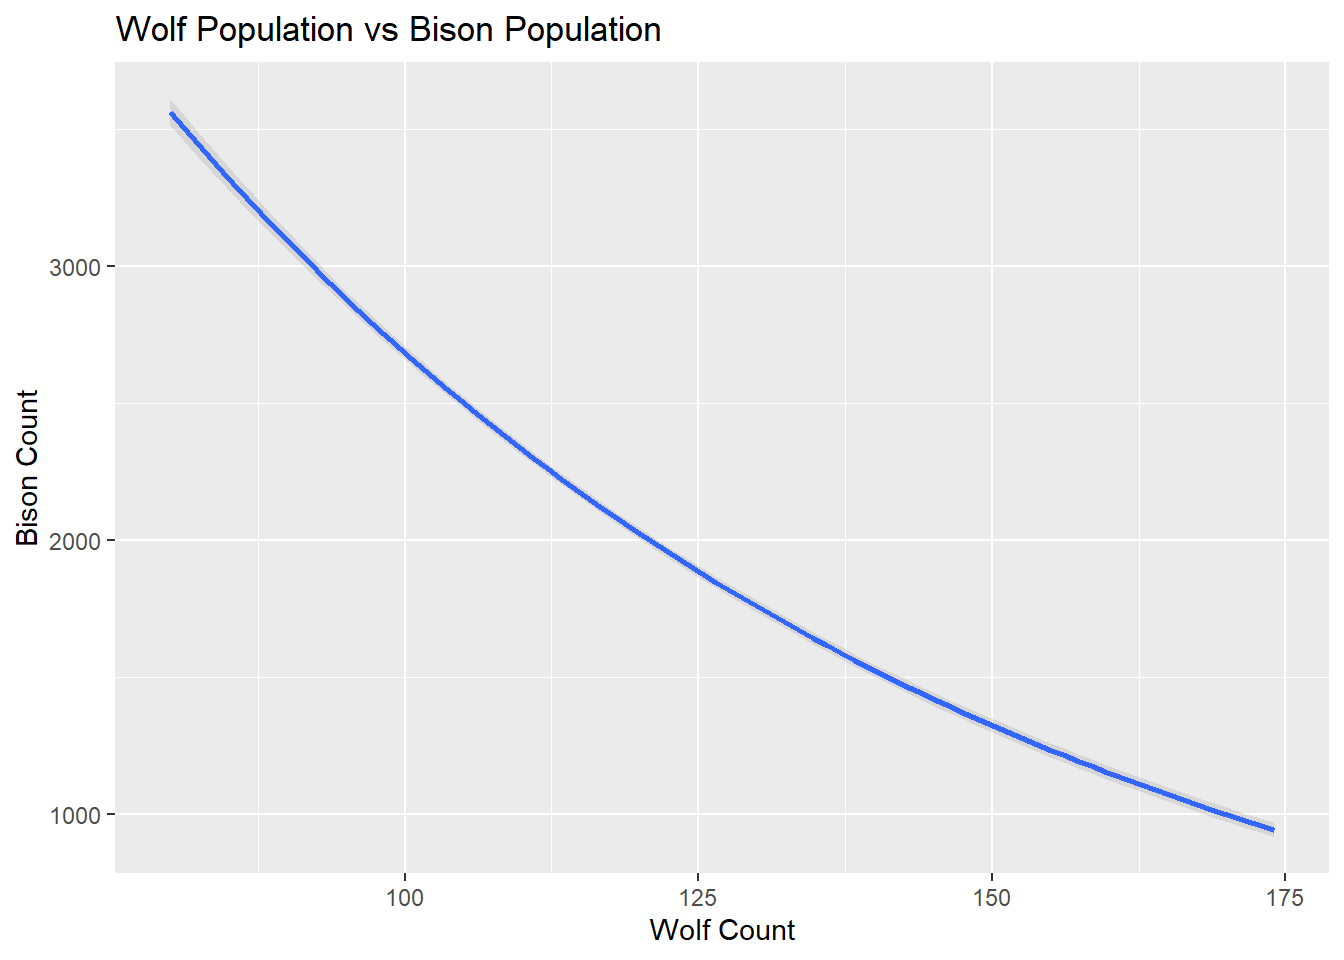

In [ ]:
library(ggplot2)
library(dplyr)
library(performance)

##### Wolf vs. Elk


Call:
glm(formula = elk_count ~ wolf_count, family = poisson, data = data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) 6.824e+00  1.293e-02   527.9   <2e-16 ***
wolf_count  1.372e-02  9.781e-05   140.2   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 47195  on 21  degrees of freedom
Residual deviance: 28638  on 20  degrees of freedom
AIC: 28865

Number of Fisher Scoring iterations: 4

[1] 0.3932011

`geom_smooth()` using formula = 'y ~ x'

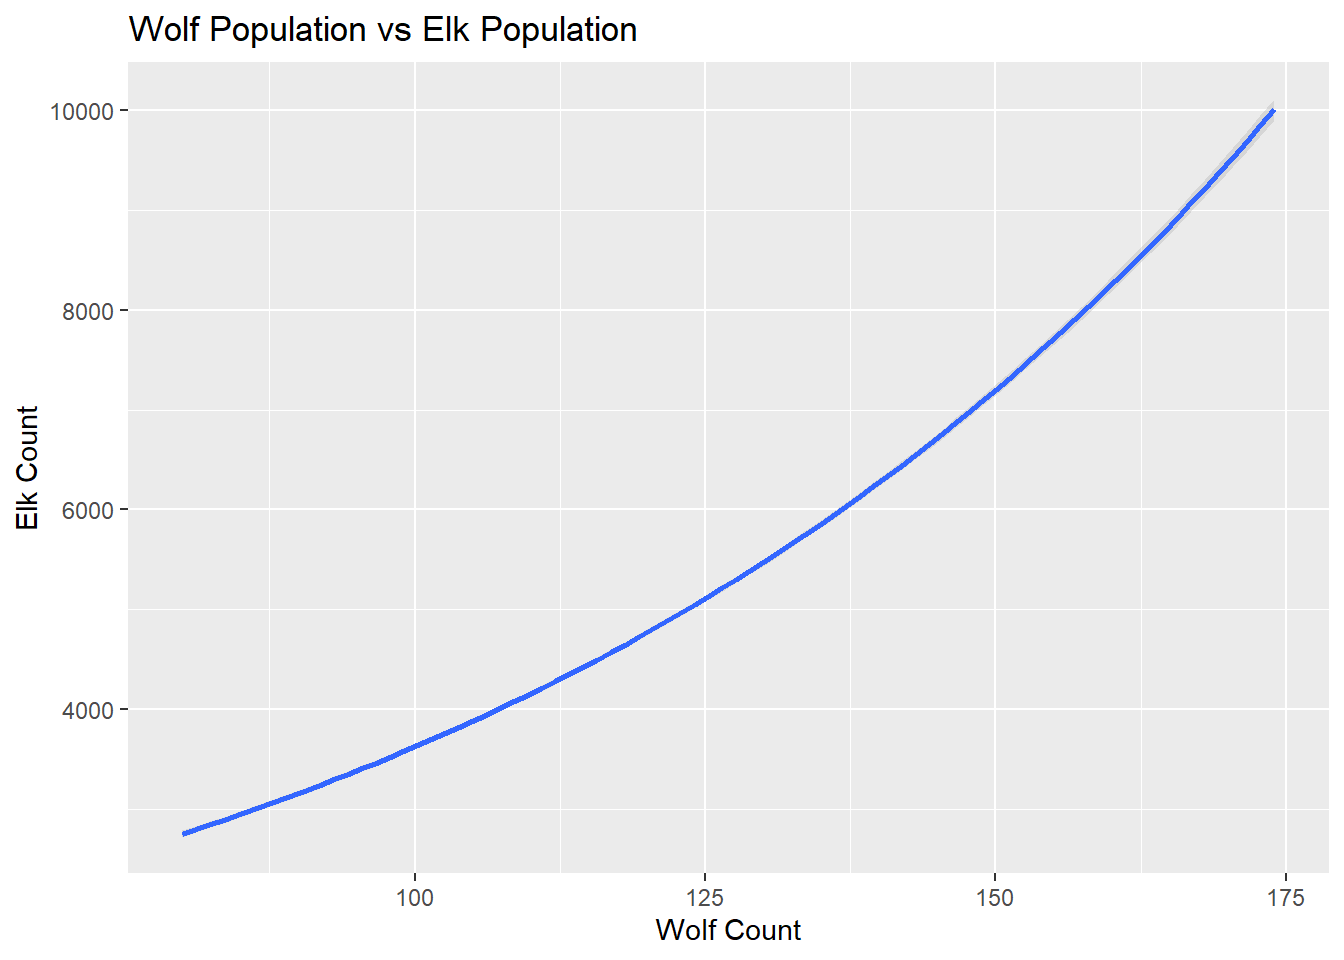

In [ ]:
wolf_elk_glm <- glm(elk_count ~ wolf_count, family = poisson, data = data)

summary(wolf_elk_glm)

##### Elk vs. Bison


Call:
glm(formula = bison_count ~ elk_count, family = poisson, data = data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  8.508e+00  8.107e-03 1049.44   <2e-16 ***
elk_count   -1.925e-04  2.007e-06  -95.94   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 13464.13  on 21  degrees of freedom
Residual deviance:   675.95  on 20  degrees of freedom
AIC: 886.93

Number of Fisher Scoring iterations: 4

[1] 0.9497962

`geom_smooth()` using formula = 'y ~ x'

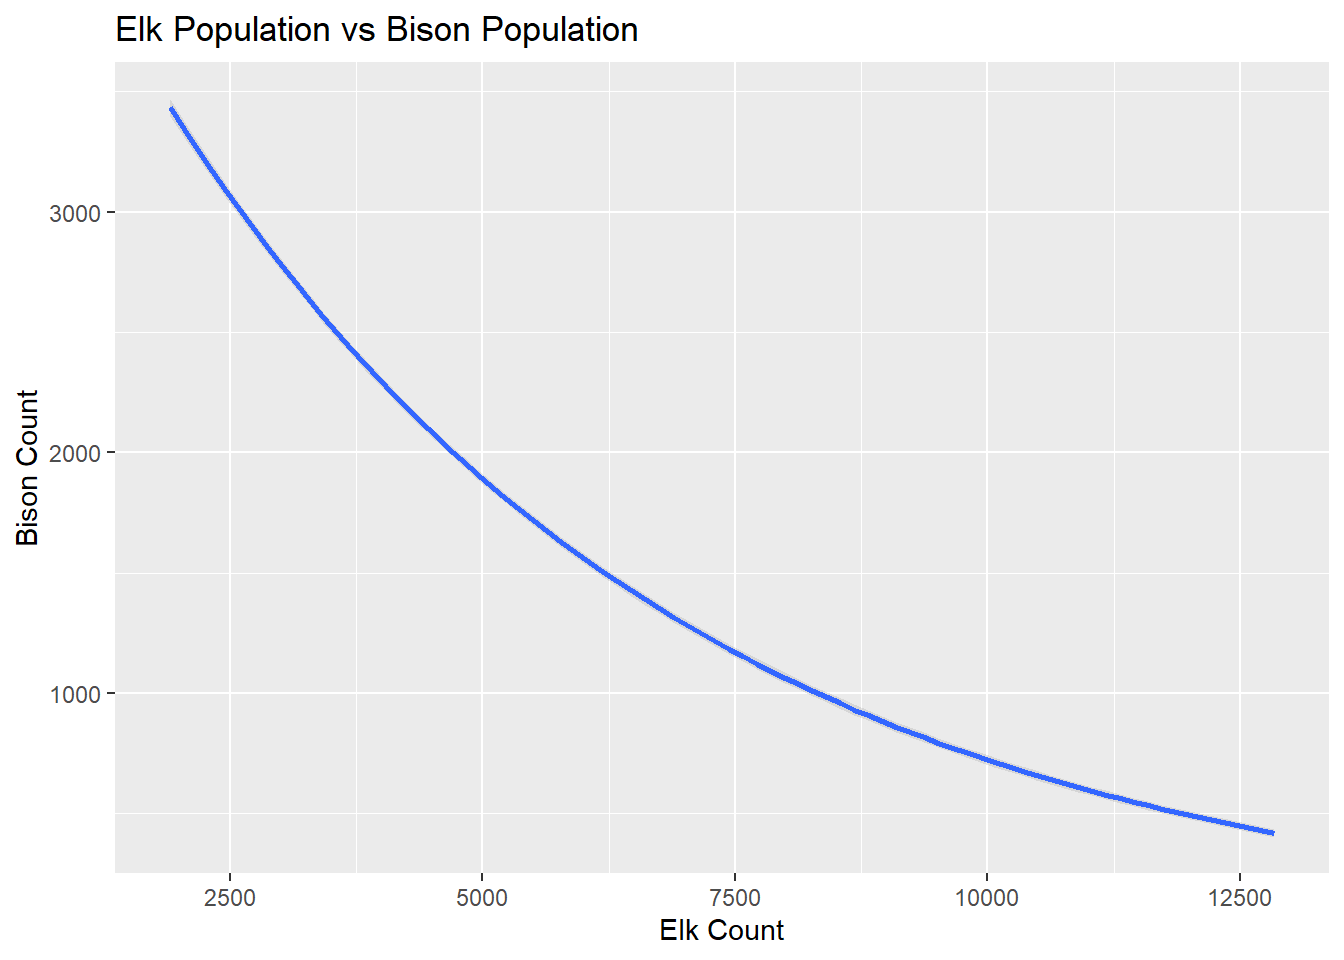

In [ ]:
elk_bison_glm <- glm(bison_count ~ elk_count, family = poisson, data = data)

summary(elk_bison_glm)

##### Bison vs. Elk


Call:
glm(formula = elk_count ~ bison_count, family = poisson, data = data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  9.668e+00  5.755e-03  1679.9   <2e-16 ***
bison_count -6.138e-04  3.127e-06  -196.3   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 47195  on 21  degrees of freedom
Residual deviance:  2059  on 20  degrees of freedom
AIC: 2285.6

Number of Fisher Scoring iterations: 4

[1] 0.9563732

`geom_smooth()` using formula = 'y ~ x'

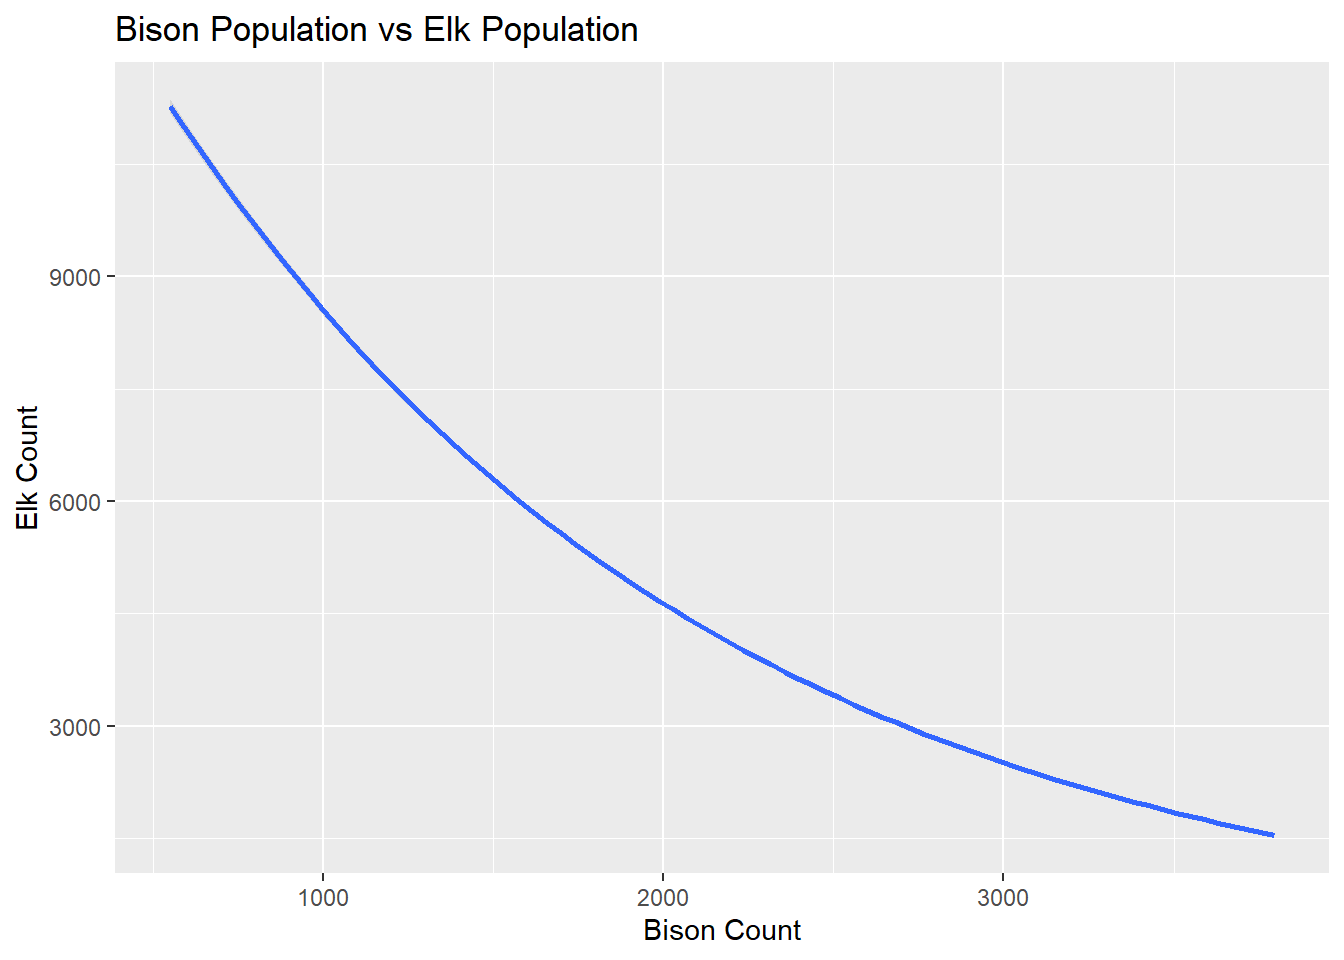

In [ ]:
bison_elk_glm <- glm(elk_count ~ bison_count, family = poisson, data = data)

summary(bison_elk_glm)

## Methods

We used two model types for our analysis, ARIMA and Generalized Linear Models. We created 4 ARIMA models, one for each prediction relationship (wolf count as a predictor for bison count and elk count, elk count as a predictor for bison count, and bison count as a predictor for elk count). We split our data into training and testing sets, with a 70/30 split. Models were aggregated in a list object contained within a models dataframe. Using the models dataframe we created a model tibble that we used to calibrate our models using the testing data. Using modeltime_accuracy() we compiled accuracy measures for the calibrated models, and then used our calibrated models to forecast predicted counts based on our data. In order to compare actual values vs. predicted values, we had to merge our forecast dataframe with our original data. We did this by renaming the .index column to “year” so that we could merge the two dataframes by “year”. We then created individual data frames for each prediction model (wolf count as a predictor for bison, …) Using these data frames, we were able to produce linear models for each prediction relationship of the response species’ actual count values versus the predicted count values. We summarized each of these models to produce summary statistics (of note, the R-squared value). To visualize the fit, we used ggplot to create plots of actual vs. predicted values, with a 1:1 line included for each plot to see how closely predictions matched actual values. After producing these plots, we were encouraged to try a different type of model that may better demonstrate the relationship between different populations. We chose to create GLMs for each prediction relationship as we knew that our data was non-normal. We used the Poisson family for our GLM because each of our data points is a count value. We then used the summary() function to compile model metrics. Summary was used to calculate R-squared using McFadden’s formula. Additionally, we used ggplot to create visualizations of each model, using geom_smooth and the method “glm” to create smooth curves of population relationships.

## Results

In the initial data exploration of “Yellowstone Wolf Population 200-2021” (Figure 1) there is an observed trend over time. This graph displays a starting population of ~125 wolves in Yellowstone Park and follows the reintroduction a few years later, where the population hits its peak at ~150 wolves. The population then decreases to where it eventually plateaus. In “Yellowstone Elk Population 2000-2021”, the population of elk are measured over time. This resulted in a steady exponential decrease. The graph displaying “Yellowstone Bison Population 2001-2021” mirrors the previous trend, and exponentially increases over time, hitting its peak at approximately 3500 bison between the years 2015 and 2020. Next is the Creating vs. Actual Predicted Models where bison_count was the dependent variable. For a one-unit increase in “.value” , there is a 0.94 increase in bison count. This suggests a positive relationship. The p-value is 4.06e-05, showing that statistically the relationship is very strong. The R-squared value is 0.7383, so approximately 74% of the variation in the bison is explained by .value. For the elk population model, the intercept is 37,593, reflecting the starting elk population. The .value is -16.76, meaning the population drops ~16.76 elk per one-unit increase. The R-Squared value falls similar to the bison model, pertaining in the ~74% range. The RSE was 619.7, accounting for a standard deviation of 620 elk. The next call compared the relationship to bison and elk populations, with a .value of 4.968 and an R-squared value of 0.8293, displaying strong relatability between the two populations. In the next call of code, bison-related data is used to predict elk population. Both the intercept and slope have a p \> 0.001 indicating high significance, as well as the R-squared value being 0.8709. In the “Elk Population vs Bison Population” graph, there is an apparent exponential decrease with Elk Count (x) as Bison Count (y) increases.

## Discussion

Our data analysis showed multiple trends in the data regarding elk, bison, and wolf population in Yellowstone National Park from 2000 to 2021, indicating how wolf reintroduction caused several different interactions in species dynamics and demonstrating the gravity of conservation initiatives like this experiment, which has been impacting species populations within the Yellowstone ecosystem for decades now. The data we analyzed included years 2000-2021, based on availability of good data. The initial increase in the wolf population followed by a plateau suggests rapid growth at the start followed by stabilization of the population, which was likely influenced by the ecosystem’s carrying capacity and availability of various resources that support the population of wolves, indicated by Figure 1.

Figure 1. Wolf Population from preliminary analysis

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'

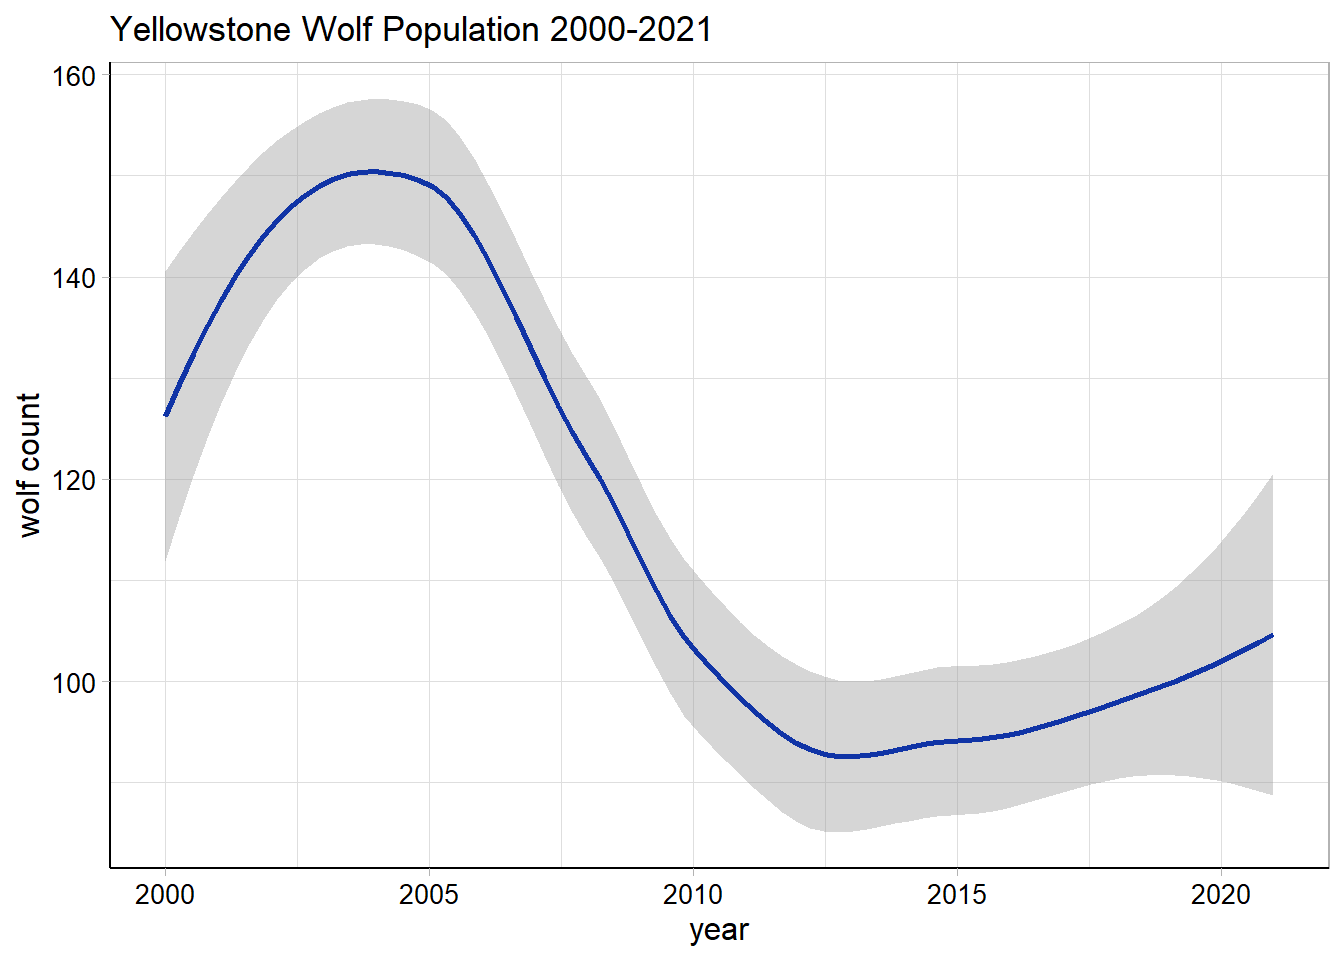

In [ ]:
print(wolf_pop_plot)

Figure 2 shows the elk population during the same time series, which shows a dramatic decrease followed by stabilization of the population.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'

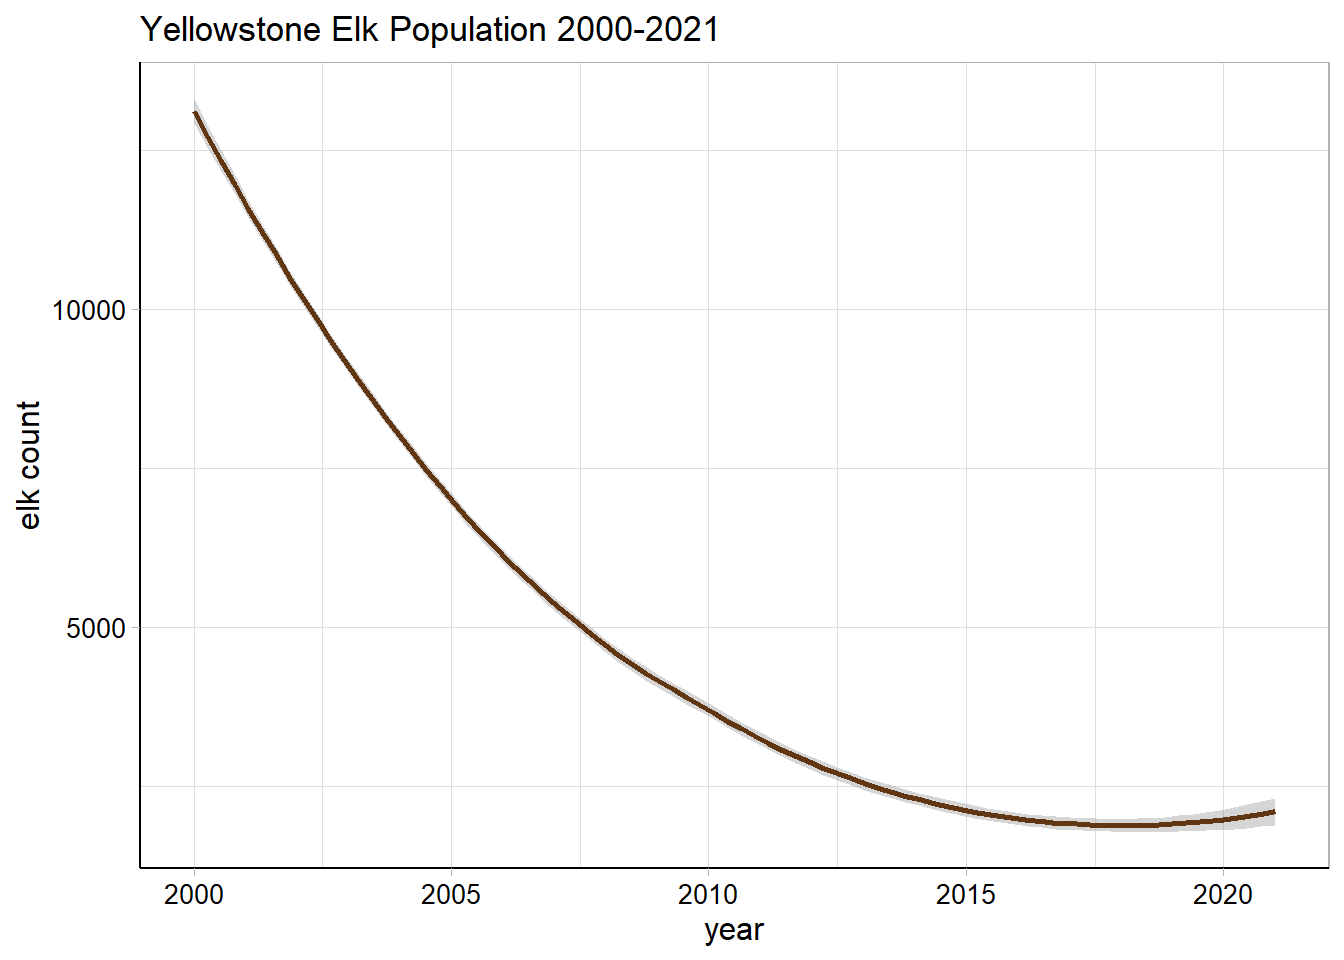

In [ ]:
print(elk_pop_plot)

Figure 2. Elk population count from preliminary analysis This rapid decline in elk population count supports the theory of top-down regulation of ecosystem dynamics. Because wolves are carnivorous apex predators and they prey on herbivores like elk, the wolf exert significant pressure on elk populations. This is further substantiated by the elk population model (Figure 2), which demonstrates a negative coefficient (-16.76) for the predictor variable, showing the decline in elk numbers over time over the two decades. With an R-squared value in the 74% range and a relatively high RSE (619.7), the model captures the variability in elk population trends, though some variation remains unaccounted for, likely due to other ecological factors such as climate, disease, or human activity. Bison populations showed a trend in population counts very different from that of the elk in Yellowstone. Shown in Figure 3, we can observe a steady increase followed by a plateau in bison population. This conflicts with the way elk populations responded to wolf reintroduction, despite the herbivorous nature of both elk and bison. The strong positive correlation between time (.value) and bison count (slope = 0.94, p = 4.06e-05) with an R-squared of 0.7383 indicates a substantial and statistically significant rise in bison numbers.The trend in bison population is likely because the decrease in elk population allowed for more robust resource availability and a dramatic decrease in competition for various food sources for bison, which are grazers by nature. So, the increase in bison population was likely a direct response to the decrease in elk population, which was a response to the wolf population increase. The bison population peaks from 2015 to 2020, appearing to stabilize, but it would be fascinating to examine data from 2020 to 2025 to see if there are any unexpected changes, which would be a limitation of our data since we are not observing the most recent years.

Figure 3. Bison population

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'

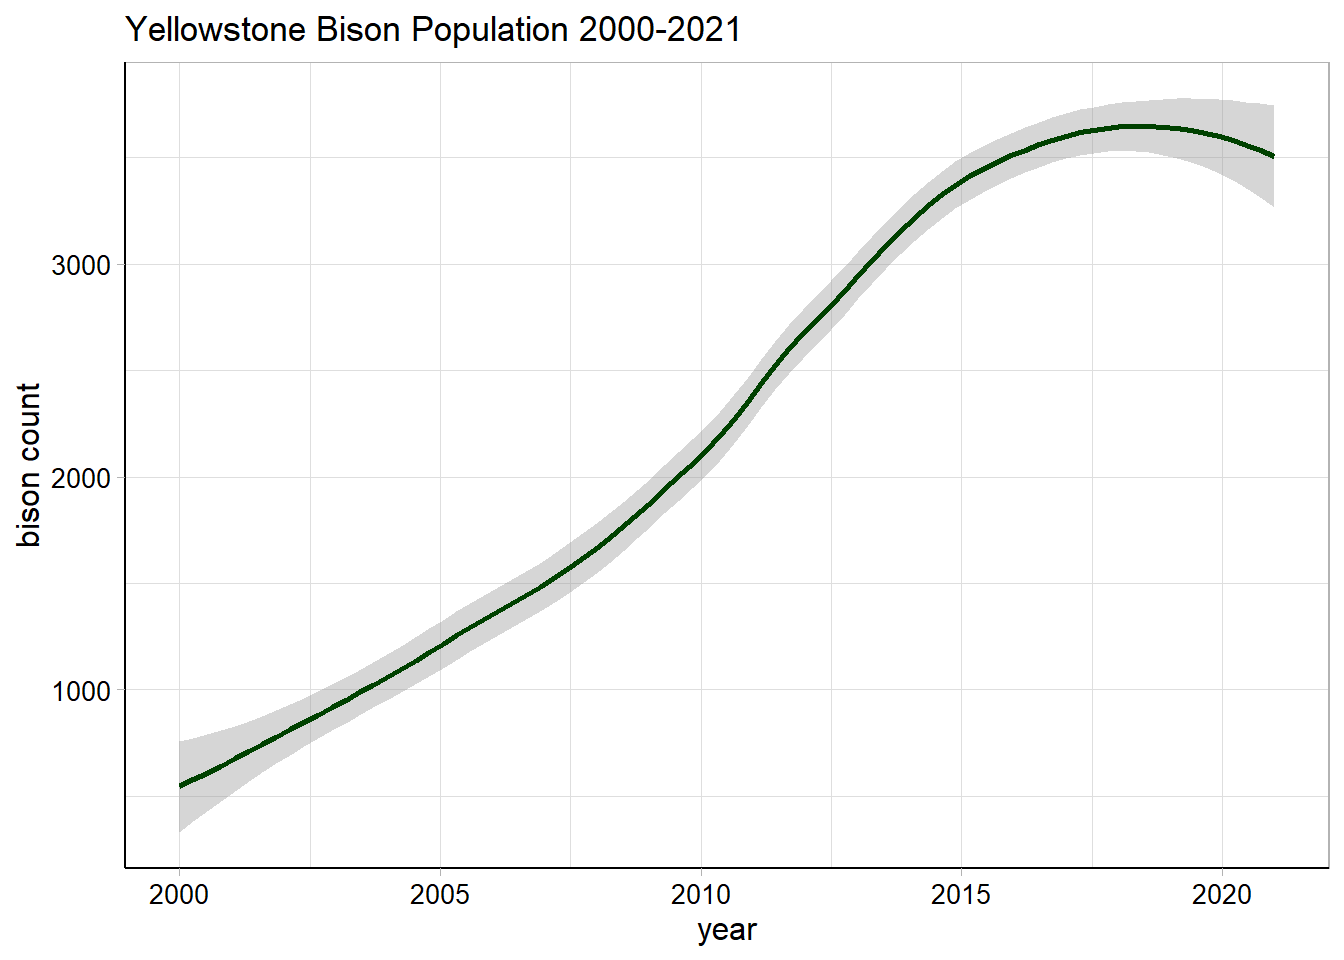

In [ ]:
print(bison_pop_plot)

Our next step in the analysis of the Yellowstone population data involved testing the distribution data. Shapiro-Wilk tests displayed p-values of 5.507e-06, 2.789e-07, 0.0005066 for wolves, elk, and bison respectively. These values indicate that the data was not normally distributed. Following this, we ran a QQ test, which tests the distribution of the error from the various data. This was shown in Figure 4, which shows the QQ plots from each species.

Figure 4. QQ plots for wolf, elk, and bison populations.

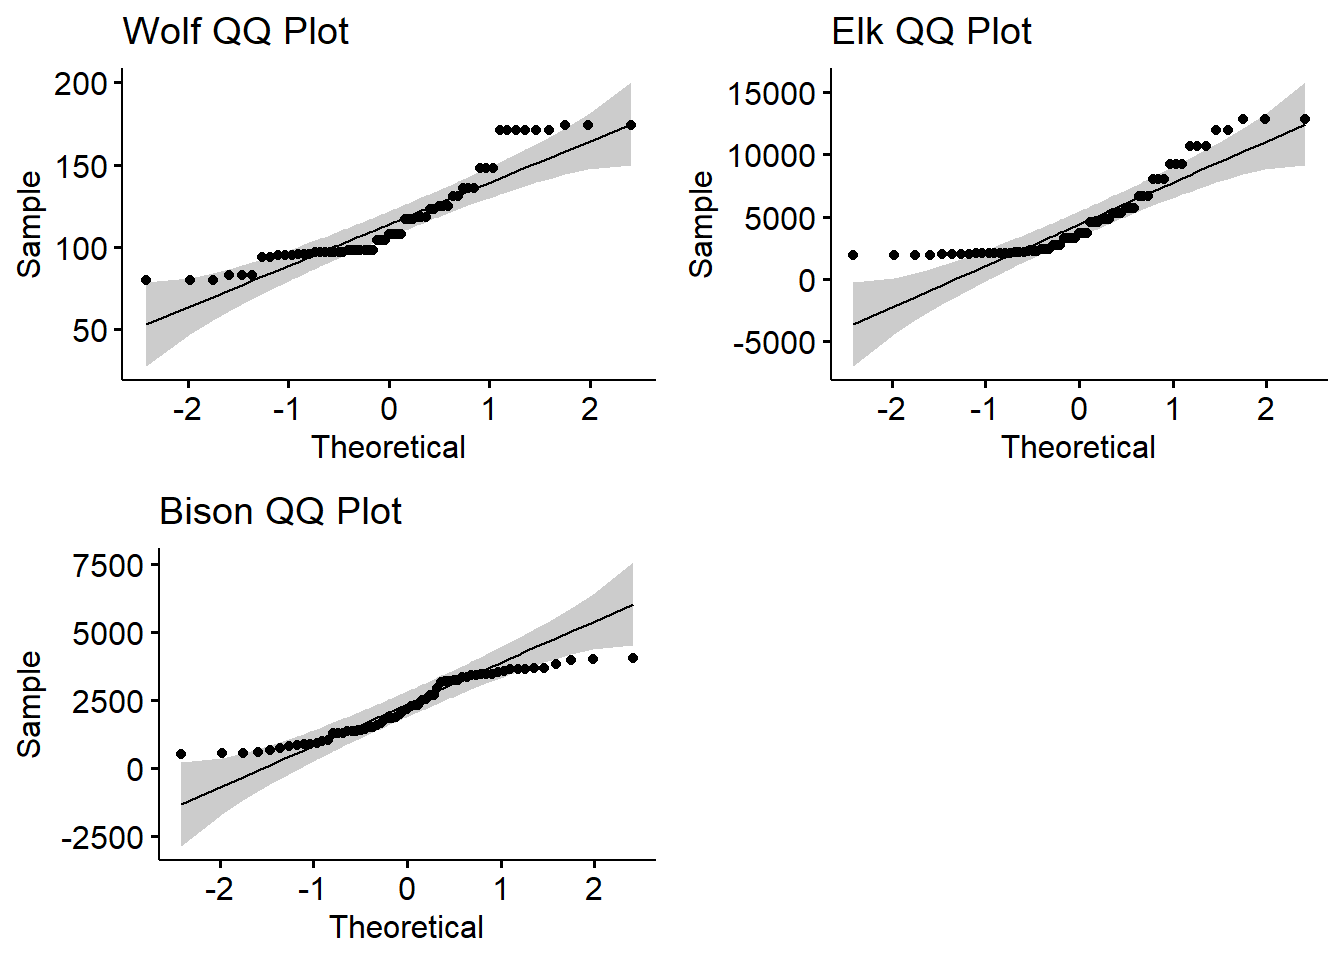

In [ ]:
print(ggarrange(wolf_gg, elk_gg, bison_gg))

Next, we made comparative models showing actual vs. predicted values relating to population counts for each species. Our models used each species count as a predictor variable in the population of another species, but as you will see, our models struggled to show real relationships, so this was a challenge we faced in our analysis, requiring us to create different models for species count comparisons. Figure 5 attempts to explain the population dynamics of wolves and bison, but the model barely shows a relationship.

Figure 5. Bison count predicted by wolf population.

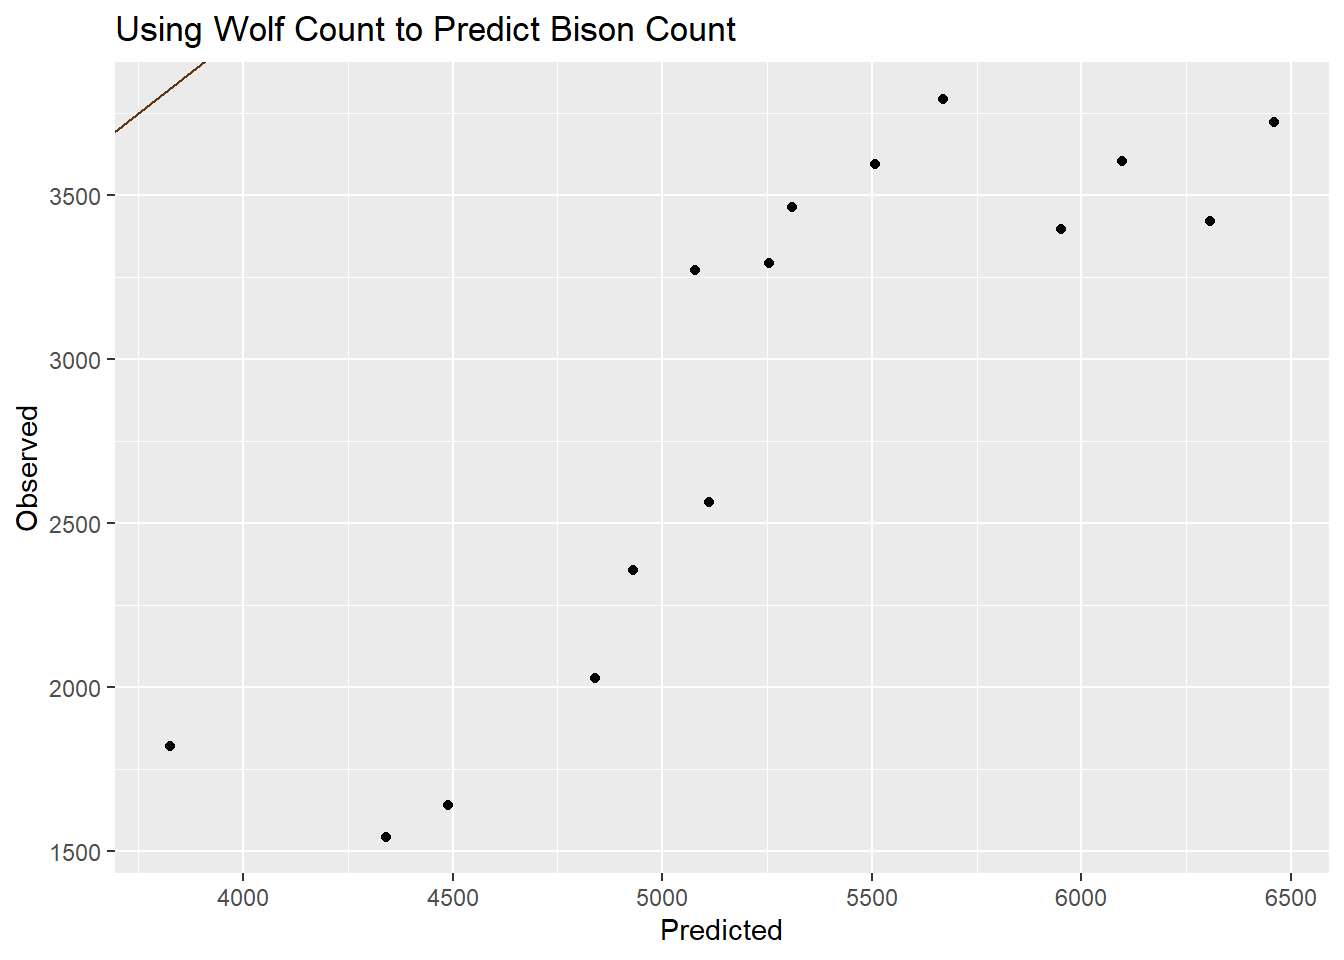

In [ ]:
print(lm_wolf_bison)

Similarly, we made plots to show wolf count predicting elk count, elk count to predict bison count, and bison count to predict elk count (Figures 6, 7, and 8). These plots, again, do not show these predictions very clearly, so this was a hiccup in our analysis.

Figure 6. Wolf population predicting Elk population.

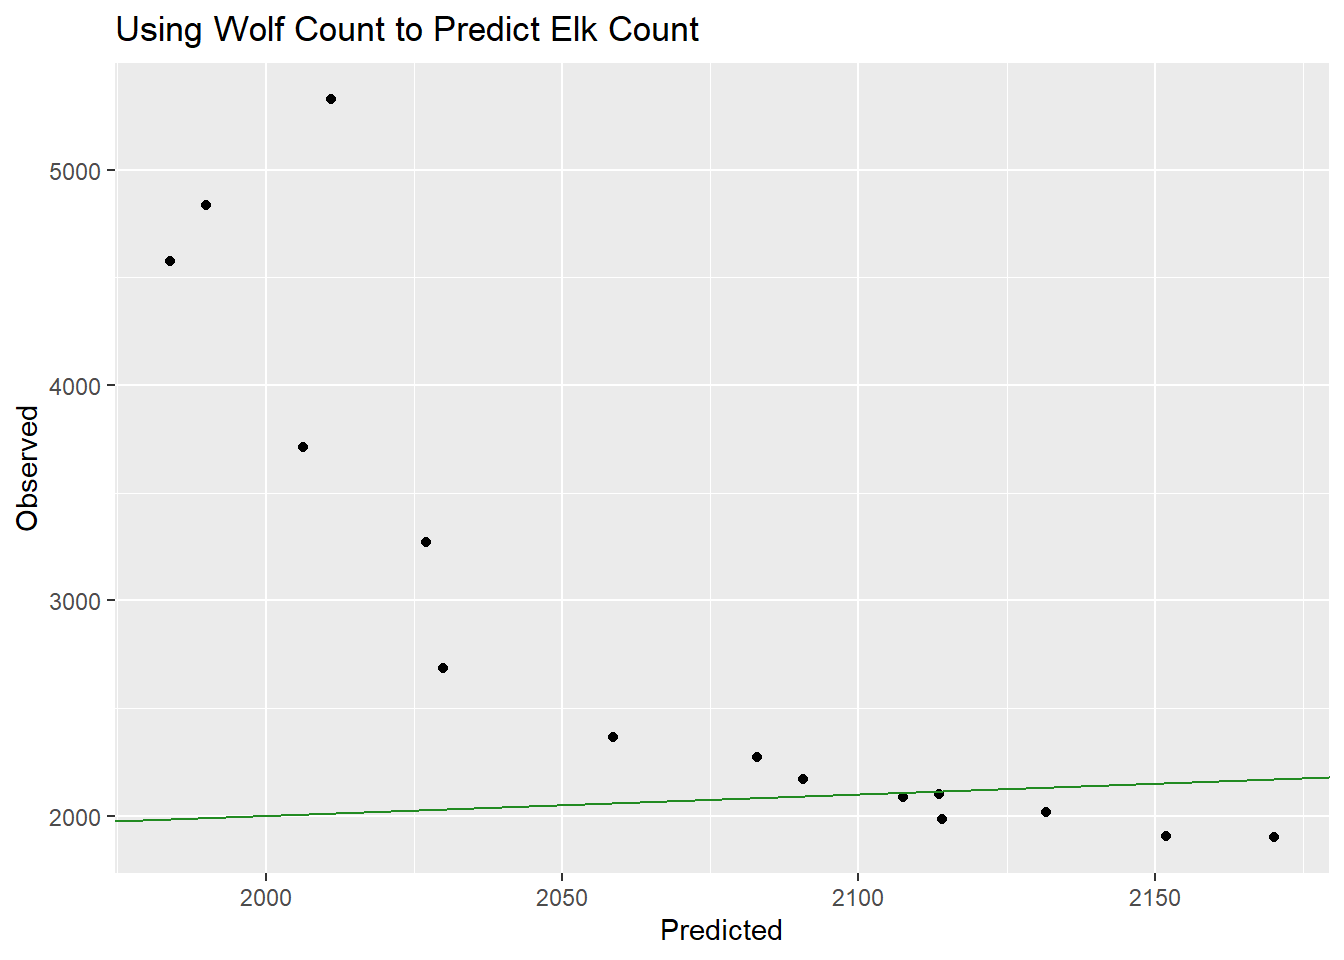

In [ ]:
print(lm_wolf_elk)

Figure 7. Elk count predicting bison population.

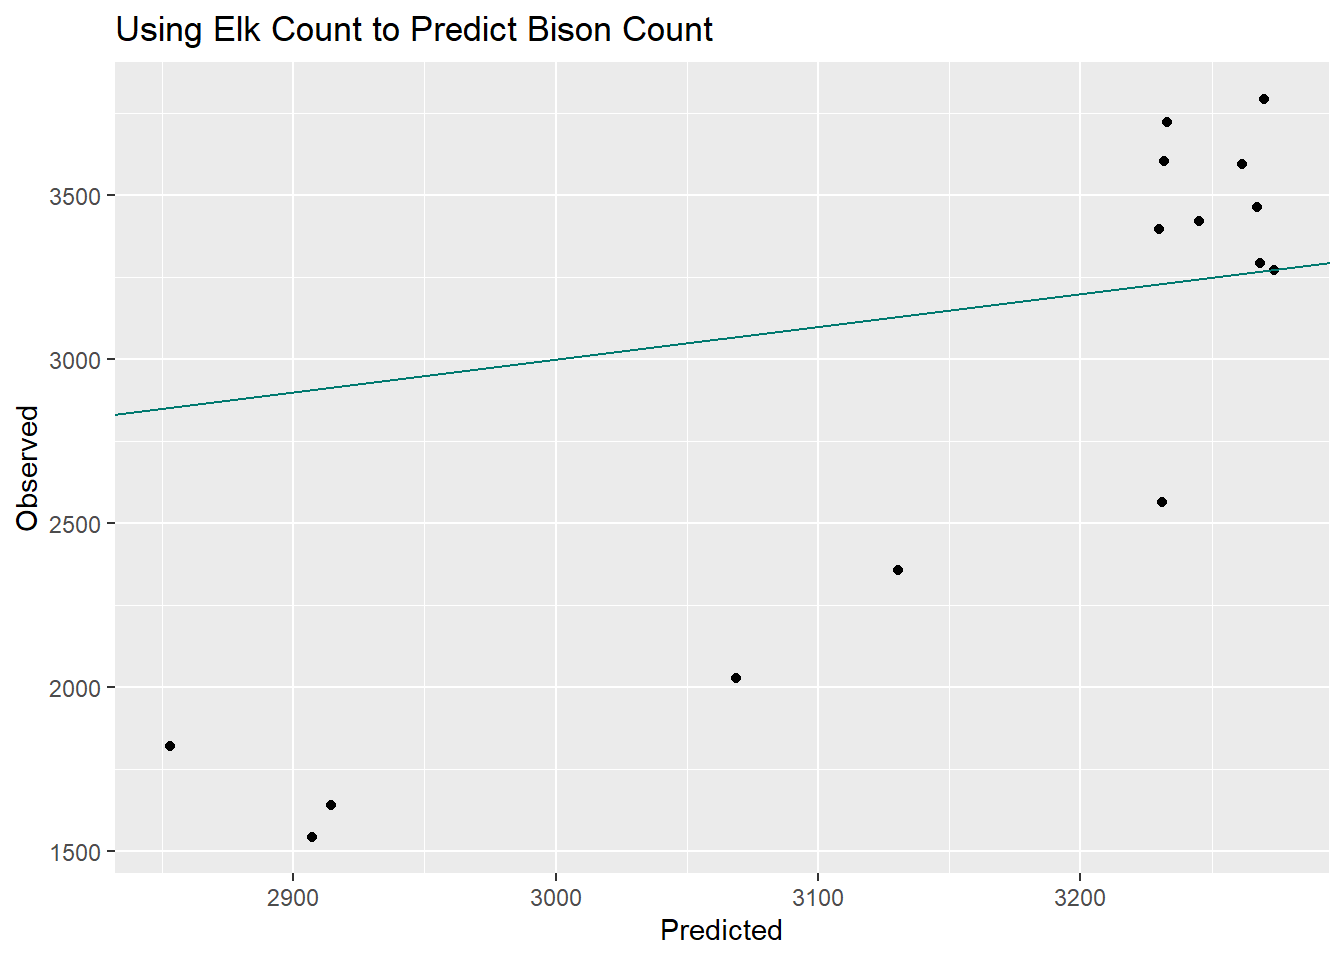

In [ ]:
print(lm_elk_bison)

Figure 8. Bison count predicting elk count.

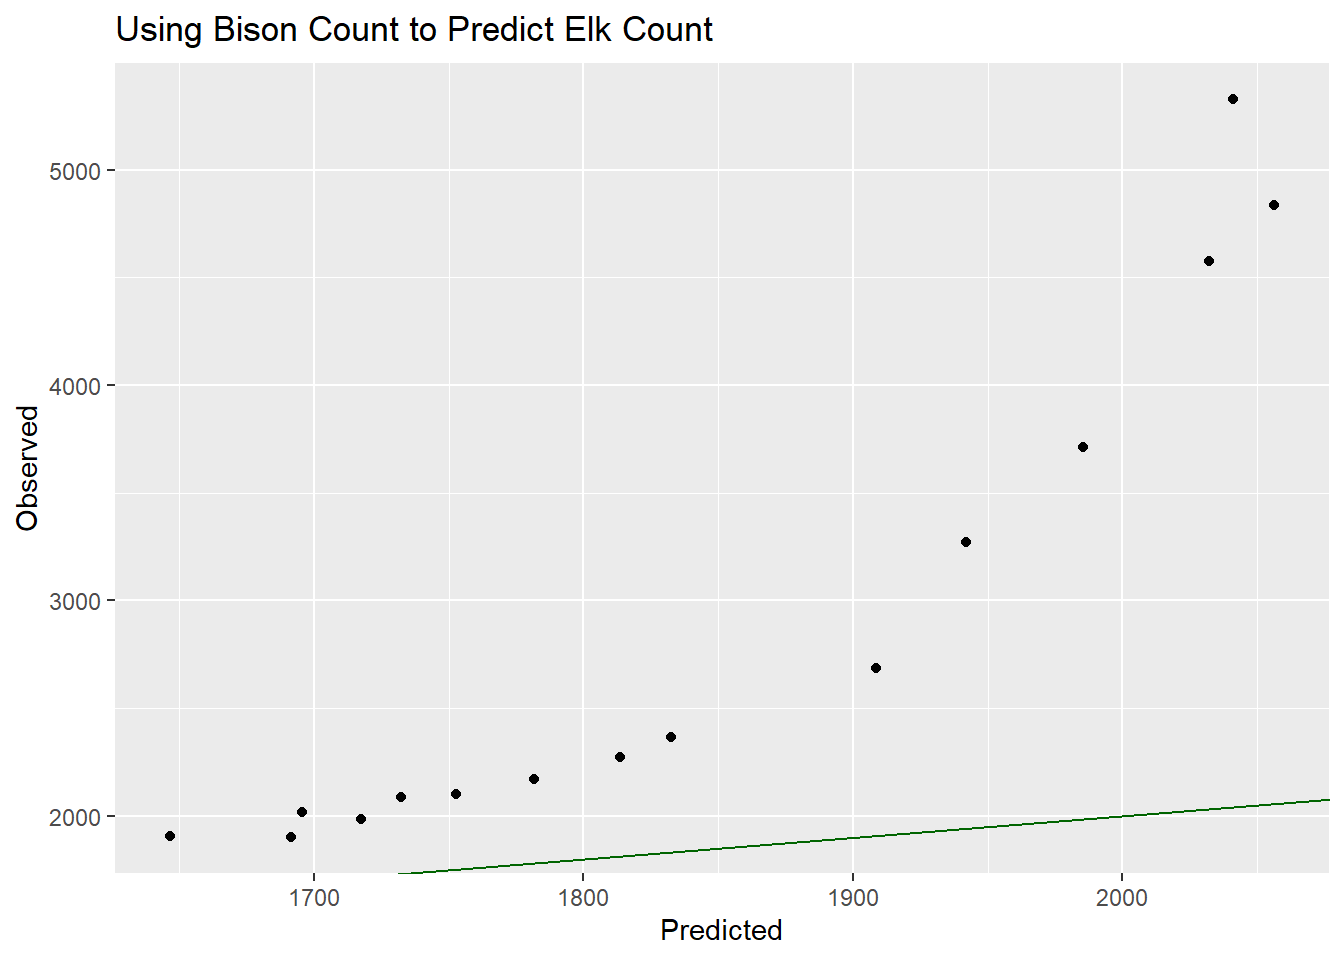

In [ ]:
print(lm_bison_elk)

Of these plots, the best one appears to be Figure 7, elk count predicting bison count, just based on the distribution of data points around the 1:1 line, which indicates that this model is decent at predicting values compared to actual values. Lastly, our GLM comparative models examine populations of each species compared with one another throughout the time series. Figure 9 shows wolf population vs. bison population, Figure 10 shows wolf vs. elk populations, Figure 11 shows elk vs. bison counts, and Figure 12 indicates bison vs. elk populations.

Figure 9. Wolf vs. Bison, Figure 10. Wolf vs. Elk, Figure 11. Elk vs. Bison, Figure 12. Bison vs. Elk

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'

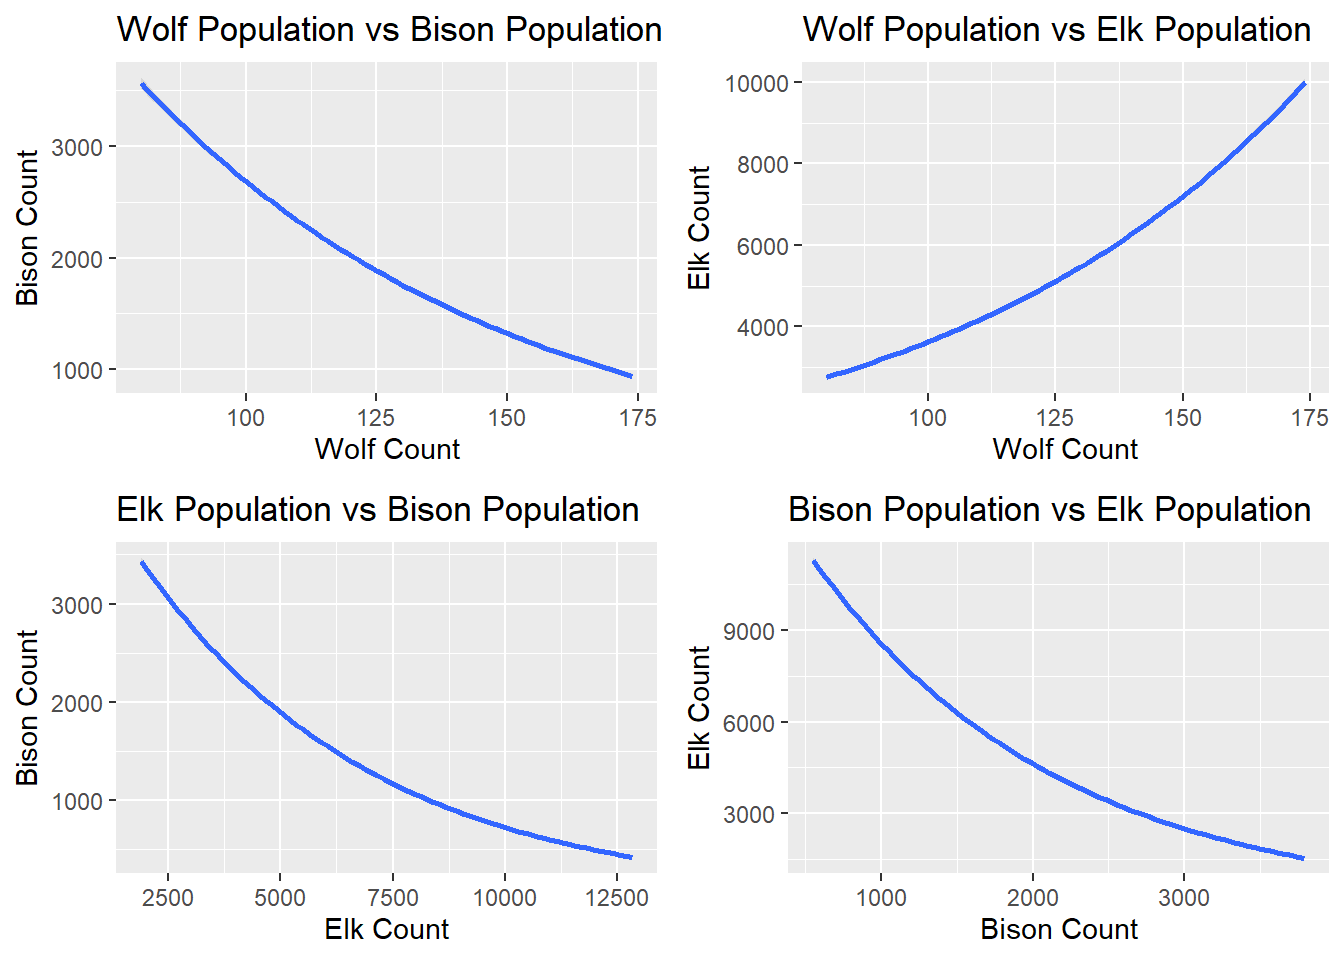

In [ ]:
ggarrange(wolf_bison_gg, wolf_elk_gg, elk_bison_gg, bison_elk_gg)

The strongest model of the four appears to be Elk vs. Bison, with the lowest AIC value of 886.93, compared with values in the thousands for the other models. These comparative models further illustrate interspecies relationships. The model relating elk and bison populations reveals a significant inverse relationship (slope = 4.968, R-squared = 0.8293), suggesting that as bison numbers increase, elk numbers decline. This relationship may reflect not just predation dynamics but also broader shifts in ecosystem dynamics, such as resource redistribution or differing responses to environmental pressures. Furthermore, when bison-related data were used to predict elk population, the exceptionally high R-squared value (0.8709) and statistically significant coefficients reinforce the conclusion that bison trends are a strong predictor of elk population changes. The “Elk Population vs Bison Population” graph visually confirms this inverse exponential relationship, showing how increases in bison population are strongly associated with reductions in elk numbers. This suggests possible competitive exclusion or differing habitat preferences emerging from ecological shifts influenced by wolf reintroduction and other factors. Overall, these findings underscore the complexity of trophic cascades initiated by apex predator reintroduction. They also highlight the importance of multi-species modeling in ecological studies, offering insights into how changes in one population reverberate throughout the ecosystem. Further research incorporating more environmental and anthropogenic variables could refine these models and help park management make more informed conservation decisions. There were a few limitations in our data, including the temporal scope, where we only examined years 2000-2021, where it may be necessary to reanalyze data in the future for the most recent years, since development in species populations, like the plateau in bison counts, were very recently established in 2020. Additionally, the non-normal distribution of our data prevented us from doing certain statistical analyses, and may have indicated a need to perform data transformations. Lastly, our models focused primarily on population counts, and did not incorporate environmental covariates (e.g., vegetation, climate) or human influence (e.g., hunting, land use), which could improve explanatory power. These findings highlight the long-term ecological impact of predator reintroduction and the interconnectedness of various species within ecosystems. As Yellowstone evolves, ongoing data collection is crucial for monitoring changes beyond 2021. Future models may benefit from incorporation of environmental and anthropogenic variables and potentially leverage machine learning for multi-species predictive modeling. Additionally, spatial data and mapping could help clarify how habitat use patterns differ between elk and bison in response to wolf presence.

## Conclusion

This study illustrates the profound ecological consequences of the reintroduction of wolves into Yellowstone National Park, particularly as seen through the population dynamics of elk and bison from 2000 to 2021. The stabilization of the wolf population was accompanied by a significant decline in elk numbers and a concurrent rise in bison populations, suggesting a trophic cascade caused by wolf reintroduction in the national park. Statistical modeling confirmed strong relationships between these trends, with bison populations increasing in response to ecological shifts in resource competition and predator-prey interactions. The inverse relationship between elk and bison populations, supported by R-squared values and significant p-values, emphasizes the connections between different species within an ecosystem. This information highlights the value of long-term population monitoring and multivariate analysis in understanding the full scope of ecological change. Moving forward, continued data collection and integrated ecosystem modeling will be crucial in guiding conservation policy and management strategies in Yellowstone and beyond. Recognizing how predator dynamics shape broader biodiversity can inform future efforts to restore and sustain ecological balance in protected natural areas.

Cooper, D., & Hobbs, N. (2023). Twenty years of salix height in response to experimental manipulation of browsing and water table, northern range of yellowstone national park. *Dryad, Dataset. Https://Doi. Org/10.5061/Dryad. Sqv9s4n7n*.

Metz, M., Smith, D., Stahler, D., Vucetich, J., & Peterson, R. (2016). Temporal variation in wolf predation dynamics in yellowstone: Lessons learned from two decades of research. *Yellowstone Science*, *24*, 55–60.

Ripple, W. J., & Beschta, R. L. (2012). Trophic cascades in yellowstone: The first 15 years after wolf reintroduction. *Biological Conservation*, *145*, 205–213. [https://doi.org/10.1016/j.biocon.2011.11.005. (https://www.sciencedirect.com/science/article/pii/S0006320711004046)](https://doi.org/10.1016/j.biocon.2011.11.005.
(https://www.sciencedirect.com/science/article/pii/S0006320711004046))

Smith, D. W., Mech, L. D., Meagher, M., Clark, W. E., Jaffe, R., Phillips, M. K., & Mack, J. A. (2000). Wolf–bison interactions in yellowstone national park. *Journal of Mammalogy*, *81*(4), 1128–1135.